## Plots for experiments in population setting

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from matplotlib import gridspec
from src import utils, population_icp, policy
from src.policy import ratios
import pickle

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

### Load and process data

In [4]:
def load_experiments(filename):
    f = open(filename, "rb")
    results = pickle.load(f)
    return results[0], results[1::]

def merge_runs(old, new, min_merge=False):
    if len(old) == len(new) or (len(old) < len(new) and min_merge):
        for i in range(len(old)):
            old[i] += new[i]
    else:
        raise Exception("Cannot merge")
    return old

In [5]:
filenames = ["experiments/results_1588630517_runs:4_max_iter:-1_random_state:1_tag:may4pop_G:500_k:3.0_p_min:15_p_max:15_w_min:0.0_w_max:1.0_var_min:0.0_var_max:1.0_int_min:0.0_int_max:1.0_do:False_i_mean:10_i_var:1_finite:False.pickle",
"experiments/results_1588631668_runs:4_max_iter:-1_random_state:0_tag:may4pop_G:500_k:3.0_p_min:15_p_max:15_w_min:0.0_w_max:1.0_var_min:0.0_var_max:1.0_int_min:0.0_int_max:1.0_do:False_i_mean:10_i_var:1_finite:False.pickle"]
    
cases, results = load_experiments(filenames[0])
for filename in filenames[1::]:
        print("Loading %s" % filename)
        new_cases, new_results = load_experiments(filename)
        cases += new_cases
        for k in range(len(results)):
            results[k] = merge_runs(results[k], new_results[k])
max_iter = 15
print("\nLoaded a total of %d graphs with %d runs each" % (len(results[0][0]), len(results[0])))

Loading experiments/results_1588631668_runs:4_max_iter:-1_random_state:0_tag:may4pop_G:500_k:3.0_p_min:15_p_max:15_w_min:0.0_w_max:1.0_var_min:0.0_var_max:1.0_int_min:0.0_int_max:1.0_do:False_i_mean:10_i_var:1_finite:False.pickle

Loaded a total of 1000 graphs with 4 runs each


In [6]:
violators = []
for run in results[0]:
    for i, result in enumerate(run):        
        ancestors = utils.ancestors(cases[i].target, cases[i].sem.W)
        descendants = utils.descendants(cases[i].target, cases[i].sem.W)
        (parents, children, poc, mb) = utils.graph_info(cases[i].target, cases[i].sem.W)
        # Assertions
        for j, ratios in enumerate(result.ratios()):
            # Assert that ancestors have ratio above 1/2 always
            if not (ratios[list(ancestors)] >= 1/2).all():
                print("\nGraph", i)
                print("an < 1/2")
                print("PA:", parents, "CH:", children, "POC:", poc, "AN:", ancestors, "DE:", descendants)
                print("Interventions:", result.interventions())
                print(ratios)
            # Assert that ancestors have ratio below 1/2 always
            #if not (ratios[list(descendants - children)] <= 1/2).all():
            #    print("\nGraph", i)
            #    print("non-ch desc > 1/2")
            #    print("PA:", parents, "CH:", children, "POC:", poc, "AN:", ancestors, "DE:", descendants)
            #    print("Interventions:", result.interventions())
            #    print(ratios)
            # Assert that non-descendants poc have ratio above 1/2 always
            violators = np.where(ratios[list(poc - descendants)] < 1/2)[0]
            if len(violators) > 0:
                print("\nGraph", i)
                print("non-desc poc < 1/2")
                print(ratios[list(poc - descendants)][violators])
                print("PA:", parents, "CH:", children, "POC:", poc, "AN:", ancestors, "DE:", descendants)
                print("Interventions:", result.interventions())
                print(ratios)
            # Assert that parents have ratio above 1/2 always
            assert (ratios[list(parents)] >= 1/2).all()
            # Assert that children have ratio below 1/2 always
            #assert (ratios[list(children)] <= 1/2).all()


Graph 1
non-desc poc < 1/2
[0.4990735]
PA: {6} CH: {9} POC: {0, 2, 10, 11, 14} AN: {8, 4, 6} DE: {9}
Interventions: [[5], [9], [14], [6], [13], [11], [7], [3], [10], [2], [4], [8], [0], [12], [5]]
[0.50030883 0.         0.51389747 0.49969117 0.52563311 0.36751081
 0.63248919 0.50586782 0.50401482 0.         0.5        0.4990735
 0.5        0.5009265  0.52563311]

Graph 1
non-desc poc < 1/2
[0.4]
PA: {6} CH: {9} POC: {0, 2, 10, 11, 14} AN: {8, 4, 6} DE: {9}
Interventions: [[5], [9], [14], [6], [13], [11], [7], [3], [10], [2], [4], [8], [0], [12], [5]]
[0.5 0.  0.5 0.5 0.5 0.4 0.8 0.5 0.5 0.  0.5 0.5 0.5 0.5 0.4]

Graph 3
non-desc poc < 1/2
[0.49535604]
PA: {4, 5} CH: {2} POC: {13, 7} AN: {4, 5} DE: {2}
Interventions: [[9], [6], [12], [8], [5], [13], [3], [0], [11], [4], [1], [2], [10], [7], [9]]
[0.49613003 0.50773994 0.4373065  0.50773994 0.54179567 0.57894737
 0.5        0.51083591 0.50773994 0.79256966 0.5        0.5
 0.4752322  0.49535604 0.        ]

Graph 3
non-desc poc < 1/2
[0.

Graph 31
non-desc poc < 1/2
[0.4896]
PA: {4, 12} CH: {13} POC: {9, 10} AN: {4, 12, 6} DE: {13}
Interventions: [[14], [13], [10], [1], [8], [5], [7], [9], [3], [4], [2], [12], [0], [6], [14]]
[0.5184 0.4608 0.4992 0.5376 0.832  0.4928 0.5824 0.4608 0.4992 0.5032
 0.4896 0.     0.98   0.     0.4992]

Graph 31
non-desc poc < 1/2
[0.4896]
PA: {4, 12} CH: {13} POC: {9, 10} AN: {4, 12, 6} DE: {13}
Interventions: [[14], [13], [10], [1], [8], [5], [7], [9], [3], [4], [2], [12], [0], [6], [14]]
[0.5184 0.4608 0.4992 0.5376 0.832  0.4928 0.5824 0.4608 0.4992 0.5032
 0.4896 0.     0.98   0.     0.4992]

Graph 31
non-desc poc < 1/2
[0.48953301]
PA: {4, 12} CH: {13} POC: {9, 10} AN: {4, 12, 6} DE: {13}
Interventions: [[14], [13], [10], [1], [8], [5], [7], [9], [3], [4], [2], [12], [0], [6], [14]]
[0.51529791 0.46376812 0.49919485 0.5410628  0.8373591  0.48953301
 0.57971014 0.46376812 0.49919485 0.5        0.48953301 0.
 0.97987118 0.         0.49919485]

Graph 31
non-desc poc < 1/2
[0.49230769]
PA

[0.5        0.         0.46783626 0.74853801 0.         0.49122807
 0.60818713 0.         0.57309942 0.5        0.5        0.49122807
 0.         0.47368421 0.49122807]

Graph 52
non-desc poc < 1/2
[0.4]
PA: {3, 12, 5} CH: {6} POC: {8} AN: {3, 12, 5} DE: {0, 6, 14}
Interventions: [[8], [12], [1], [4], [0], [13], [7], [6], [3], [11], [2], [10], [14], [5], [8]]
[0.         0.5        0.38461538 0.8        0.53846154 0.61538462
 0.         0.53846154 0.4        0.         0.5        0.5
 1.         0.4        0.        ]

Graph 55
non-desc poc < 1/2
[0.49639344 0.49836066]
PA: {5, 14} CH: {1} POC: {0, 2, 6, 12} AN: {2, 4, 5, 9, 12, 14} DE: {1, 10}
Interventions: [[7], [4], [2], [10], [11], [14], [12], [9], [1], [8], [0], [13], [5], [6], [7]]
[0.49639344 0.41967213 0.5        0.         0.50360656 0.91606557
 0.49836066 0.67147541 0.49967213 0.5        0.37770492 0.49967213
 0.54557377 0.49901639 0.50360656]

Graph 55
non-desc poc < 1/2
[0.48669202 0.49429658]
PA: {5, 14} CH: {1} POC: {0, 


Graph 91
non-desc poc < 1/2
[0.48387097]
PA: {9, 4, 13} CH: {11, 12, 7} POC: {0, 5, 8, 10, 11} AN: {9, 4, 13} DE: {11, 12, 7}
Interventions: [[13], [2], [11], [8], [12], [3], [14], [4], [5], [7], [9], [10], [1], [0], [13]]
[0.48387097 0.48387097 0.51612903 0.5        0.51612903 0.5
 0.         0.5        0.5        0.5        0.5        0.
 0.         1.         0.51612903]

Graph 91
non-desc poc < 1/2
[0.48387097]
PA: {9, 4, 13} CH: {11, 12, 7} POC: {0, 5, 8, 10, 11} AN: {9, 4, 13} DE: {11, 12, 7}
Interventions: [[13], [2], [11], [8], [12], [3], [14], [4], [5], [7], [9], [10], [1], [0], [13]]
[0.48387097 0.48387097 0.51612903 0.5        0.51612903 0.5
 0.         0.5        0.5        0.5        0.5        0.
 0.         1.         0.51612903]

Graph 91
non-desc poc < 1/2
[0.48387097]
PA: {9, 4, 13} CH: {11, 12, 7} POC: {0, 5, 8, 10, 11} AN: {9, 4, 13} DE: {11, 12, 7}
Interventions: [[13], [2], [11], [8], [12], [3], [14], [4], [5], [7], [9], [10], [1], [0], [13]]
[0.48387097 0.483870


Graph 179
non-desc poc < 1/2
[0.49514563 0.48543689]
PA: {3} CH: {12} POC: {1, 5, 8, 10} AN: {0, 3, 5} DE: {12}
Interventions: [[6], [2], [9], [4], [11], [8], [3], [0], [1], [10], [12], [5], [7], [13], [6]]
[0.5        0.51456311 0.5        0.96116505 0.48543689 0.51456311
 0.62135922 0.5        0.49514563 0.5        0.48543689 0.5
 0.33980583 0.5        0.        ]

Graph 179
non-desc poc < 1/2
[0.49197861]
PA: {3} CH: {12} POC: {1, 5, 8, 10} AN: {0, 3, 5} DE: {12}
Interventions: [[6], [2], [9], [4], [11], [8], [3], [0], [1], [10], [12], [5], [7], [13], [6]]
[0.5        0.55614973 0.55080214 0.97326203 0.49197861 0.51604278
 0.59893048 0.5        0.5026738  0.5        0.49197861 0.5
 0.28877005 0.4973262  0.        ]

Graph 179
non-desc poc < 1/2
[0.49438202]
PA: {3} CH: {12} POC: {1, 5, 8, 10} AN: {0, 3, 5} DE: {12}
Interventions: [[6], [2], [9], [4], [11], [8], [3], [0], [1], [10], [12], [5], [7], [13], [6]]
[0.5        0.57865169 0.52808989 0.97752809 0.49438202 0.51685393
 0.5842


Graph 241
non-desc poc < 1/2
[0.4]
PA: {2, 11} CH: {3, 4, 8, 9, 13} POC: {2, 3, 4, 6, 11, 13, 14} AN: {2, 11} DE: {1, 3, 4, 5, 8, 9, 12, 13}
Interventions: [[7], [1], [6], [4], [2], [14], [0], [9], [12], [13], [8], [11], [3], [5], [7]]
[0.4 0.  0.8 0.5 0.  0.  0.4 0.5 0.  0.5 0.  0.5 0.  0.5 0.5]

Graph 248
non-desc poc < 1/2
[0.2079646]
PA: {1} CH: {3, 13, 14} POC: {1, 3, 7, 8, 9} AN: {1} DE: {2, 3, 5, 6, 11, 13, 14}
Interventions: [[11], [13], [8], [1], [14], [9], [10], [12], [6], [5], [3], [7], [2], [0], [11]]
[0.5        0.60619469 0.49778761 0.64159292 0.         0.49778761
 0.46460177 0.50221239 0.2079646  0.60619469 0.5        0.28761062
 0.53318584 0.         0.50884956]

Graph 248
non-desc poc < 1/2
[0.34306569]
PA: {1} CH: {3, 13, 14} POC: {1, 3, 7, 8, 9} AN: {1} DE: {2, 3, 5, 6, 11, 13, 14}
Interventions: [[11], [13], [8], [1], [14], [9], [10], [12], [6], [5], [3], [7], [2], [0], [11]]
[0.5        1.         0.49635036 0.64233577 0.         0.49635036
 0.46715328 0.5       

 0.66666667 0.53333333 0.35555556]

Graph 295
non-desc poc < 1/2
[0.48888889]
PA: {1, 3, 4} CH: {10} POC: {9, 11, 5} AN: {1, 3, 4, 9, 12} DE: {10, 2}
Interventions: [[14], [0], [10], [2], [1], [11], [6], [13], [4], [7], [9], [3], [12], [5], [14]]
[0.5        1.         0.         0.71111111 0.66666667 0.53333333
 0.48888889 0.5        0.         0.5        0.         0.48888889
 0.66666667 0.53333333 0.35555556]

Graph 295
non-desc poc < 1/2
[0.48780488]
PA: {1, 3, 4} CH: {10} POC: {9, 11, 5} AN: {1, 3, 4, 9, 12} DE: {10, 2}
Interventions: [[14], [0], [10], [2], [1], [11], [6], [13], [4], [7], [9], [3], [12], [5], [14]]
[0.5        1.         0.         0.7804878  0.66666667 0.58536585
 0.48780488 0.5        0.         0.5        0.         0.48780488
 0.66666667 0.48780488 0.3902439 ]

Graph 295
non-desc poc < 1/2
[0.48780488]
PA: {1, 3, 4} CH: {10} POC: {9, 11, 5} AN: {1, 3, 4, 9, 12} DE: {10, 2}
Interventions: [[14], [0], [10], [2], [1], [11], [6], [13], [4], [7], [9], [3], [12], [5

Interventions: [[5], [3], [7], [10], [2], [1], [4], [6], [13], [0], [12], [11], [8], [9], [5]]
[0.60662252 0.53774834 0.45960265 0.50860927 0.91788079 0.
 0.44635762 0.51258278 0.08609272 0.55761589 0.51523179 0.
 0.44900662 0.79337748 0.        ]

Graph 345
non-desc poc < 1/2
[0.48603352 0.43994413]
PA: {4, 13} CH: {8, 5} POC: {0, 1, 7, 10, 12} AN: {4, 13} DE: {8, 11, 5}
Interventions: [[5], [3], [7], [10], [2], [1], [4], [6], [13], [0], [12], [11], [8], [9], [5]]
[0.58659218 0.53212291 0.46648045 0.51396648 0.91340782 0.
 0.45810056 0.48603352 0.06424581 0.55027933 0.51117318 0.
 0.43994413 0.82402235 0.        ]

Graph 345
non-desc poc < 1/2
[0.48603352 0.43994413]
PA: {4, 13} CH: {8, 5} POC: {0, 1, 7, 10, 12} AN: {4, 13} DE: {8, 11, 5}
Interventions: [[5], [3], [7], [10], [2], [1], [4], [6], [13], [0], [12], [11], [8], [9], [5]]
[0.58659218 0.53212291 0.46648045 0.51396648 0.91340782 0.
 0.45810056 0.48603352 0.06424581 0.55027933 0.51117318 0.
 0.43994413 0.82402235 0.        ]

G

PA: {14} CH: {12} POC: {1, 13, 9} AN: {0, 2, 6, 9, 14} DE: {12}
Interventions: [[3], [7], [12], [13], [14], [11], [9], [0], [6], [2], [1], [5], [8], [10], [3]]
[0.5        0.57613169 0.53223594 0.5733882  0.         0.5
 0.5        0.60356653 0.47325103 0.5569273  0.5        0.44993141
 0.4005487  0.4951989  0.55418381]

Graph 385
non-desc poc < 1/2
[0.48741419]
PA: {14} CH: {12} POC: {1, 13, 9} AN: {0, 2, 6, 9, 14} DE: {12}
Interventions: [[3], [7], [12], [13], [14], [11], [9], [0], [6], [2], [1], [5], [8], [10], [3]]
[0.5        0.51258581 0.53089245 0.51258581 0.         0.5
 0.5        0.56750572 0.48283753 0.53546911 0.5        0.46681922
 0.         0.48741419 0.58581236]

Graph 385
non-desc poc < 1/2
[0.44554455]
PA: {14} CH: {12} POC: {1, 13, 9} AN: {0, 2, 6, 9, 14} DE: {12}
Interventions: [[3], [7], [12], [13], [14], [11], [9], [0], [6], [2], [1], [5], [8], [10], [3]]
[0.5        0.5        0.57425743 0.5        0.         0.5
 0.5        0.55445545 0.48514851 0.53465347 0.5  

[0.49174079 0.40406607 0.47013977 0.3252859  0.45743329]
PA: {0, 9, 11} CH: {8} POC: {1, 3, 4, 6, 10, 12} AN: {0, 9, 2, 11} DE: {8}
Interventions: [[8], [6], [4], [3], [10], [9], [12], [13], [2], [0], [11], [7], [14], [1], [8]]
[0.82719187 0.53875476 0.56543837 0.49174079 0.40406607 0.
 0.47013977 0.53240152 0.         1.         0.3252859  0.74205845
 0.45743329 0.47395172 0.5343075 ]

Graph 433
non-desc poc < 1/2
[0.49711816 0.42507205 0.48414986 0.36887608 0.46974063]
PA: {0, 9, 11} CH: {8} POC: {1, 3, 4, 6, 10, 12} AN: {0, 9, 2, 11} DE: {8}
Interventions: [[8], [6], [4], [3], [10], [9], [12], [13], [2], [0], [11], [7], [14], [1], [8]]
[0.85878963 0.50720461 0.5648415  0.49711816 0.42507205 0.
 0.48414986 0.51440922 0.         1.         0.36887608 0.82564841
 0.46974063 0.40345821 0.52737752]

Graph 433
non-desc poc < 1/2
[0.44444444]
PA: {0, 9, 11} CH: {8} POC: {1, 3, 4, 6, 10, 12} AN: {0, 9, 2, 11} DE: {8}
Interventions: [[8], [6], [4], [3], [10], [9], [12], [13], [2], [0], [11],


Graph 468
non-desc poc < 1/2
[0.21546961]
PA: {8, 2, 6} CH: {10} POC: {2, 4, 7, 12} AN: {8, 2, 6} DE: {10}
Interventions: [[9], [4], [10], [11], [2], [12], [7], [14], [5], [3], [6], [1], [13], [8], [9]]
[0.         0.51933702 0.82320442 0.5359116  0.21546961 0.5
 0.58563536 0.5        0.62430939 0.5        0.         0.4640884
 0.51933702 0.5        0.35911602]

Graph 468
non-desc poc < 1/2
[0.26174497]
PA: {8, 2, 6} CH: {10} POC: {2, 4, 7, 12} AN: {8, 2, 6} DE: {10}
Interventions: [[9], [4], [10], [11], [2], [12], [7], [14], [5], [3], [6], [1], [13], [8], [9]]
[0.         0.52348993 1.         0.54362416 0.26174497 0.5
 0.60402685 0.5        0.65100671 0.5        0.         0.56375839
 0.52348993 0.5        0.43624161]

Graph 468
non-desc poc < 1/2
[0.42857143 0.41558442 0.41558442]
PA: {8, 2, 6} CH: {10} POC: {2, 4, 7, 12} AN: {8, 2, 6} DE: {10}
Interventions: [[9], [4], [10], [11], [2], [12], [7], [14], [5], [3], [6], [1], [13], [8], [9]]
[0.         0.50649351 1.         0.5064935

PA: {0, 3, 12, 14} CH: {9, 5, 7} POC: {0, 1, 3, 4, 6, 8} AN: {0, 3, 12, 14} DE: {9, 13, 5, 7}
Interventions: [[10], [7], [0], [4], [9], [3], [1], [14], [11], [13], [6], [5], [12], [8], [10]]
[1.         0.5        0.         1.         0.33333333 0.5
 0.5        0.         0.5        0.         0.5        0.5
 0.5        0.         0.66666667]

Graph 524
non-desc poc < 1/2
[0.33333333]
PA: {0, 3, 12, 14} CH: {9, 5, 7} POC: {0, 1, 3, 4, 6, 8} AN: {0, 3, 12, 14} DE: {9, 13, 5, 7}
Interventions: [[10], [7], [0], [4], [9], [3], [1], [14], [11], [13], [6], [5], [12], [8], [10]]
[1.         0.5        0.         1.         0.33333333 0.5
 0.5        0.         0.5        0.         0.5        0.5
 0.5        0.         0.66666667]

Graph 526
non-desc poc < 1/2
[0.38461538]
PA: {0, 10} CH: {9, 3, 4} POC: {0, 2, 7, 9, 10, 12, 13, 14} AN: {0, 10} DE: {9, 3, 4, 6}
Interventions: [[4], [1], [10], [12], [8], [9], [14], [5], [0], [13], [3], [6], [7], [2], [4]]
[0.61538462 0.53846154 0.5        0.  

Graph 590
non-desc poc < 1/2
[0.49168646]
PA: {0} CH: {4} POC: {1, 2, 6, 12} AN: {0, 9, 2} DE: {4}
Interventions: [[14], [3], [12], [13], [11], [2], [4], [9], [7], [5], [0], [6], [8], [1], [14]]
[0.76484561 0.49168646 0.69477435 0.63776722 0.25890736 0.47149644
 0.54631829 0.5        0.49940618 0.5        0.         0.51009501
 0.52731591 0.5        0.56532067]

Graph 590
non-desc poc < 1/2
[0.48622366]
PA: {0} CH: {4} POC: {1, 2, 6, 12} AN: {0, 9, 2} DE: {4}
Interventions: [[14], [3], [12], [13], [11], [2], [4], [9], [7], [5], [0], [6], [8], [1], [14]]
[0.97244733 0.48622366 0.5834684  0.50567261 0.14262561 0.47974068
 0.53160454 0.5        0.49918963 0.5        0.         0.5
 0.55753647 0.48622366 0.51863857]

Graph 590
non-desc poc < 1/2
[0.48613377]
PA: {0} CH: {4} POC: {1, 2, 6, 12} AN: {0, 9, 2} DE: {4}
Interventions: [[14], [3], [12], [13], [11], [2], [4], [9], [7], [5], [0], [6], [8], [1], [14]]
[0.97226754 0.48613377 0.58075041 0.50244698 0.137031   0.47634584
 0.53507341 0.5

[0.33333333 0.47619048]
PA: {9, 4, 12} CH: {2} POC: {4, 6, 10, 11, 14} AN: {9, 13, 4, 12} DE: {2, 3}
Interventions: [[1], [11], [3], [13], [8], [7], [14], [2], [10], [6], [12], [4], [5], [9], [1]]
[0.         0.52380952 0.         0.         0.64285714 0.5
 0.5        0.5        0.45238095 0.9047619  0.33333333 0.5
 0.61904762 0.71428571 0.47619048]

Graph 641
non-desc poc < 1/2
[0.3  0.45]
PA: {9, 4, 12} CH: {2} POC: {4, 6, 10, 11, 14} AN: {9, 13, 4, 12} DE: {2, 3}
Interventions: [[1], [11], [3], [13], [8], [7], [14], [2], [10], [6], [12], [4], [5], [9], [1]]
[0.   0.5  0.   0.   0.65 0.5  0.5  0.5  0.45 0.9  0.3  0.5  0.65 0.7
 0.45]

Graph 641
non-desc poc < 1/2
[0.3  0.45]
PA: {9, 4, 12} CH: {2} POC: {4, 6, 10, 11, 14} AN: {9, 13, 4, 12} DE: {2, 3}
Interventions: [[1], [11], [3], [13], [8], [7], [14], [2], [10], [6], [12], [4], [5], [9], [1]]
[0.   0.5  0.   0.   0.65 0.5  0.5  0.5  0.45 0.9  0.3  0.5  0.65 0.7
 0.45]

Graph 641
non-desc poc < 1/2
[0.46153846 0.46153846]
PA: {9, 4,

[0.48]
PA: {0, 8, 2} CH: {10} POC: {1, 2, 3, 8, 9, 12} AN: {0, 8, 2, 14} DE: {10}
Interventions: [[6], [1], [10], [2], [11], [5], [0], [14], [9], [7], [3], [12], [8], [13], [6]]
[0.5  0.5  0.5  0.5  0.   0.5  0.48 0.5  0.64 0.48 0.   0.48 0.5  0.5
 0.64]

Graph 677
non-desc poc < 1/2
[0.49923195]
PA: {10, 14, 7} CH: {0, 2} POC: {6, 9, 10, 11, 14} AN: {7, 8, 9, 10, 14} DE: {0, 1, 2}
Interventions: [[12], [2], [4], [6], [10], [9], [3], [7], [8], [0], [1], [5], [11], [14], [12]]
[0.5        0.49155146 0.49155146 0.5        0.49769585 0.5
 0.5        0.50384025 0.50076805 0.58986175 0.60675883 0.49923195
 0.21351767 0.         0.50844854]

Graph 677
non-desc poc < 1/2
[0.49707602]
PA: {10, 14, 7} CH: {0, 2} POC: {6, 9, 10, 11, 14} AN: {7, 8, 9, 10, 14} DE: {0, 1, 2}
Interventions: [[12], [2], [4], [6], [10], [9], [3], [7], [8], [0], [1], [5], [11], [14], [12]]
[0.5        0.         0.         0.5        0.49122807 0.5
 0.5        0.51461988 0.50292398 0.56140351 0.62573099 0.49707602
 0.2

 0.50857143 0.48761905 0.49904762]

Graph 726
non-desc poc < 1/2
[0.48761905 0.48761905]
PA: {1} CH: {9} POC: {13, 11, 5} AN: {1} DE: {9}
Interventions: [[4], [5], [2], [14], [6], [9], [8], [7], [12], [3], [1], [11], [0], [13], [4]]
[0.49714286 0.9752381  0.48761905 0.5        0.4952381  0.48761905
 0.48761905 0.5        0.5        0.         0.         0.5047619
 0.50857143 0.48761905 0.49904762]

Graph 726
non-desc poc < 1/2
[0.49373192 0.49373192]
PA: {1} CH: {9} POC: {13, 11, 5} AN: {1} DE: {9}
Interventions: [[4], [5], [2], [14], [6], [9], [8], [7], [12], [3], [1], [11], [0], [13], [4]]
[0.49855352 0.98746384 0.49373192 0.5        0.4975892  0.49373192
 0.49373192 0.49373192 0.5        0.         0.         0.5024108
 0.50433944 0.49373192 0.49951784]

Graph 726
non-desc poc < 1/2
[0.49902534 0.49902534]
PA: {1} CH: {9} POC: {13, 11, 5} AN: {1} DE: {9}
Interventions: [[4], [5], [2], [14], [6], [9], [8], [7], [12], [3], [1], [11], [0], [13], [4]]
[0.49902534 0.99805068 0.49902534 0

non-desc poc < 1/2
[0.49970536]
PA: {1} CH: {14} POC: {4, 9, 10, 12} AN: {1} DE: {14}
Interventions: [[11], [8], [4], [6], [14], [7], [3], [13], [12], [2], [9], [0], [10], [1], [11]]
[0.47200943 0.6034178  0.50913377 0.49970536 0.5        0.
 0.49970536 0.49970536 0.50972304 0.49970536 0.52799057 0.42427814
 0.5        0.54743665 0.        ]

Graph 779
non-desc poc < 1/2
[0.49535489]
PA: {10, 4} CH: {2, 7} POC: {0, 5, 8, 10, 11, 13} AN: {10, 4} DE: {1, 2, 7, 11, 14}
Interventions: [[9], [1], [0], [7], [13], [2], [10], [3], [4], [6], [8], [11], [14], [5], [9]]
[0.51300632 0.49879227 0.47565961 0.52118172 0.50102192 0.51282051
 0.53214418 0.50185805 0.54143441 0.23894463 0.61947232 0.49368265
 0.         0.49535489 0.4998142 ]

Graph 779
non-desc poc < 1/2
[0.49566975]
PA: {10, 4} CH: {2, 7} POC: {0, 5, 8, 10, 11, 13} AN: {10, 4} DE: {1, 2, 7, 11, 14}
Interventions: [[9], [1], [0], [7], [13], [2], [10], [3], [4], [6], [8], [11], [14], [5], [9]]
[0.52569284 0.22127598 0.46593533 0.5202078


Graph 820
non-desc poc < 1/2
[0.48918469 0.47254576]
PA: {1, 6} CH: {9, 13} POC: {2, 3, 5, 6, 8, 12, 13} AN: {1, 3, 6} DE: {9, 13}
Interventions: [[0], [9], [12], [13], [10], [3], [7], [8], [2], [1], [6], [4], [5], [14], [0]]
[0.55241265 0.5        0.48918469 0.53577371 0.44925125 0.51747088
 0.85191348 0.50915141 0.50415973 0.         0.50083195 0.
 0.47254576 0.         0.5       ]

Graph 820
non-desc poc < 1/2
[0.48869565 0.47304348]
PA: {1, 6} CH: {9, 13} POC: {2, 3, 5, 6, 8, 12, 13} AN: {1, 3, 6} DE: {9, 13}
Interventions: [[0], [9], [12], [13], [10], [3], [7], [8], [2], [1], [6], [4], [5], [14], [0]]
[0.53217391 0.5        0.48869565 0.52869565 0.45913043 0.50608696
 0.89043478 0.49043478 0.5026087  0.         0.51652174 0.
 0.47304348 0.         0.5       ]

Graph 820
non-desc poc < 1/2
[0.49285714 0.48571429]
PA: {1, 6} CH: {9, 13} POC: {2, 3, 5, 6, 8, 12, 13} AN: {1, 3, 6} DE: {9, 13}
Interventions: [[0], [9], [12], [13], [10], [3], [7], [8], [2], [1], [6], [4], [5], [14], [0

 0.85454545 0.5        0.85289256]

Graph 868
non-desc poc < 1/2
[0.32904884]
PA: {12, 14} CH: {3} POC: {1, 10, 11, 12} AN: {12, 14} DE: {9, 3}
Interventions: [[10], [13], [4], [6], [3], [7], [0], [9], [11], [2], [5], [12], [14], [1], [10]]
[0.49100257 0.32904884 0.49742931 0.         0.51413882 0.44473008
 0.32904884 0.48586118 0.         0.         0.55784062 0.51413882
 0.77377892 0.5        0.77120823]

Graph 868
non-desc poc < 1/2
[0.33862434]
PA: {12, 14} CH: {3} POC: {1, 10, 11, 12} AN: {12, 14} DE: {9, 3}
Interventions: [[10], [13], [4], [6], [3], [7], [0], [9], [11], [2], [5], [12], [14], [1], [10]]
[0.48148148 0.33862434 0.49470899 0.         0.5        0.44973545
 0.33862434 0.47089947 0.         0.         0.55555556 0.52910053
 0.78835979 0.5        0.78306878]

Graph 868
non-desc poc < 1/2
[0.43835616]
PA: {12, 14} CH: {3} POC: {1, 10, 11, 12} AN: {12, 14} DE: {9, 3}
Interventions: [[10], [13], [4], [6], [3], [7], [0], [9], [11], [2], [5], [12], [14], [1], [10]]
[0.438356


Graph 911
non-desc poc < 1/2
[0.49321267]
PA: {1} CH: {8, 3} POC: {2, 3, 7, 12} AN: {1} DE: {8, 3, 5}
Interventions: [[5], [7], [14], [12], [3], [6], [2], [11], [1], [13], [8], [10], [4], [9], [5]]
[0.         0.57918552 0.49321267 0.         0.5        0.
 0.5        0.50678733 0.         0.49773756 0.49773756 0.50678733
 0.5        0.57918552 0.43438914]

Graph 911
non-desc poc < 1/2
[0.48974943]
PA: {1} CH: {8, 3} POC: {2, 3, 7, 12} AN: {1} DE: {8, 3, 5}
Interventions: [[5], [7], [14], [12], [3], [6], [2], [11], [1], [13], [8], [10], [4], [9], [5]]
[0.         0.58314351 0.48974943 0.         0.5        0.
 0.50341686 0.50341686 0.         0.49658314 0.49658314 0.51025057
 0.5        0.58314351 0.43735763]

Graph 911
non-desc poc < 1/2
[0.46153846]
PA: {1} CH: {8, 3} POC: {2, 3, 7, 12} AN: {1} DE: {8, 3, 5}
Interventions: [[5], [7], [14], [12], [3], [6], [2], [11], [1], [13], [8], [10], [4], [9], [5]]
[0.         0.61538462 0.46153846 0.         0.5        0.
 0.5        0.5       

 0.5        0.5        0.5       ]

Graph 959
non-desc poc < 1/2
[0.44104803]
PA: {0} CH: {9, 2} POC: {0, 1, 4, 6, 7, 10, 11} AN: {0} DE: {9, 2}
Interventions: [[4], [13], [9], [10], [14], [1], [7], [11], [2], [12], [0], [5], [6], [3], [4]]
[0.5720524  0.44104803 0.02183406 0.5        0.51091703 0.57641921
 0.50218341 0.51091703 0.         0.         0.51091703 0.51091703
 0.5        0.5        0.5       ]

Graph 959
non-desc poc < 1/2
[0.42857143]
PA: {0} CH: {9, 2} POC: {0, 1, 4, 6, 7, 10, 11} AN: {0} DE: {9, 2}
Interventions: [[4], [13], [9], [10], [14], [1], [7], [11], [2], [12], [0], [5], [6], [3], [4]]
[0.57142857 0.42857143 0.         0.5        0.5        0.57142857
 0.5        0.5        0.         0.         0.5        0.5
 0.5        0.5        0.5       ]

Graph 959
non-desc poc < 1/2
[0.42857143]
PA: {0} CH: {9, 2} POC: {0, 1, 4, 6, 7, 10, 11} AN: {0} DE: {9, 2}
Interventions: [[4], [13], [9], [10], [14], [1], [7], [11], [2], [12], [0], [5], [6], [3], [4]]
[0.57142857 0.42

[0.49230769]
PA: {4, 12} CH: {13} POC: {9, 10} AN: {4, 12, 6} DE: {13}
Interventions: [[1], [13], [10], [3], [4], [7], [14], [5], [0], [2], [9], [8], [12], [6], [1]]
[0.49230769 0.49230769 0.5        0.49230769 1.         0.49230769
 0.5        0.49230769 0.5        0.5        0.49230769 0.
 0.98461538 0.         0.5       ]

Graph 31
non-desc poc < 1/2
[0.49230769]
PA: {4, 12} CH: {13} POC: {9, 10} AN: {4, 12, 6} DE: {13}
Interventions: [[1], [13], [10], [3], [4], [7], [14], [5], [0], [2], [9], [8], [12], [6], [1]]
[0.49230769 0.49230769 0.5        0.49230769 1.         0.49230769
 0.5        0.49230769 0.5        0.5        0.49230769 0.
 0.98461538 0.         0.5       ]

Graph 31
non-desc poc < 1/2
[0.49230769]
PA: {4, 12} CH: {13} POC: {9, 10} AN: {4, 12, 6} DE: {13}
Interventions: [[1], [13], [10], [3], [4], [7], [14], [5], [0], [2], [9], [8], [12], [6], [1]]
[0.49230769 0.49230769 0.5        0.49230769 1.         0.49230769
 0.5        0.49230769 0.5        0.5        0.49230769

 0.         0.5        1.        ]

Graph 65
non-desc poc < 1/2
[0.42857143]
PA: {3, 14} CH: {1, 5} POC: {0, 3, 10, 11, 13, 14} AN: {3, 13, 6, 14} DE: {1, 5}
Interventions: [[2], [6], [11], [7], [1], [14], [3], [4], [9], [0], [10], [8], [13], [5], [2]]
[0.57142857 0.         0.5        1.         0.5        0.42857143
 0.5        0.5        0.5        0.5        0.5        0.42857143
 0.         0.5        1.        ]

Graph 66
non-desc poc < 1/2
[0.44401544]
PA: {1} CH: {13, 11, 5} POC: {0, 3, 6, 8, 9, 12, 14} AN: {1} DE: {5, 11, 13}
Interventions: [[12], [14], [2], [5], [1], [6], [4], [0], [3], [11], [13], [9], [8], [7], [12]]
[0.61389961 0.87644788 0.55212355 0.5        0.5        0.27799228
 0.44401544 0.5        0.5        0.52509653 0.         0.20849421
 0.5984556  0.48648649 0.55598456]

Graph 66
non-desc poc < 1/2
[0.49056604]
PA: {1} CH: {13, 11, 5} POC: {0, 3, 6, 8, 9, 12, 14} AN: {1} DE: {5, 11, 13}
Interventions: [[12], [14], [2], [5], [1], [6], [4], [0], [3], [11], [13], 

non-desc poc < 1/2
[0.47524752]
PA: {1, 12, 5} CH: {0, 6} POC: {5, 7, 9, 10, 12} AN: {1, 2, 5, 10, 12} DE: {0, 11, 6}
Interventions: [[14], [7], [6], [1], [2], [9], [11], [8], [5], [0], [12], [3], [13], [10], [14]]
[0.33663366 1.         0.5        0.47524752 0.         1.
 0.         0.66336634 0.5        0.47524752 0.67326733 0.16831683
 0.95049505 0.47524752 0.47524752]

Graph 122
non-desc poc < 1/2
[0.49253731 0.47761194]
PA: {1, 12, 5} CH: {0, 6} POC: {5, 7, 9, 10, 12} AN: {1, 2, 5, 10, 12} DE: {0, 11, 6}
Interventions: [[14], [7], [6], [1], [2], [9], [11], [8], [5], [0], [12], [3], [13], [10], [14]]
[0.         1.         0.5        0.47761194 0.         1.
 0.         0.49253731 0.5        0.47761194 0.50746269 0.
 0.95522388 0.47761194 0.47761194]

Graph 130
non-desc poc < 1/2
[0.49844237]
PA: {6} CH: {8} POC: {1, 5, 6, 13} AN: {5, 6} DE: {8}
Interventions: [[1], [6], [8], [4], [13], [11], [14], [5], [0], [7], [2], [12], [3], [10], [1]]
[0.5        0.79750779 0.5        0.49844


Graph 198
non-desc poc < 1/2
[0.49981082]
PA: {0, 1, 4, 6, 10, 14} CH: {5} POC: {8, 9, 4} AN: {0, 1, 2, 4, 6, 8, 10, 14} DE: {12, 5}
Interventions: [[11], [1], [2], [0], [13], [4], [6], [8], [7], [12], [5], [9], [10], [14], [11]]
[0.5035944  0.61256148 0.5        0.         0.50056754 0.4918653
 0.5        0.50851305 0.50245933 0.49981082 0.50775634 0.22512297
 0.4918653  0.58115778 0.5081347 ]

Graph 198
non-desc poc < 1/2
[0.49675325]
PA: {0, 1, 4, 6, 10, 14} CH: {5} POC: {8, 9, 4} AN: {0, 1, 2, 4, 6, 8, 10, 14} DE: {12, 5}
Interventions: [[11], [1], [2], [0], [13], [4], [6], [8], [7], [12], [5], [9], [10], [14], [11]]
[1.         1.         0.81168831 0.         0.6038961  0.41558442
 1.         0.61363636 0.66233766 0.49675325 0.55681818 0.49512987
 0.41558442 0.76623377 0.64285714]

Graph 198
non-desc poc < 1/2
[0.48275862]
PA: {0, 1, 4, 6, 10, 14} CH: {5} POC: {8, 9, 4} AN: {0, 1, 2, 4, 6, 8, 10, 14} DE: {12, 5}
Interventions: [[11], [1], [2], [0], [13], [4], [6], [8], [7], [12]

Graph 254
non-desc poc < 1/2
[0.49456522]
PA: {0, 3, 12} CH: {4, 5} POC: {0, 8} AN: {0, 2, 3, 10, 11, 12, 14} DE: {4, 5}
Interventions: [[4], [10], [6], [7], [5], [14], [2], [9], [12], [0], [3], [13], [8], [11], [4]]
[0.64402174 0.         0.55434783 0.72826087 0.         0.
 0.35054348 0.5        0.49456522 0.50543478 0.71195652 0.54347826
 0.68478261 0.5        0.68478261]

Graph 254
non-desc poc < 1/2
[0.49056604]
PA: {0, 3, 12} CH: {4, 5} POC: {0, 8} AN: {0, 2, 3, 10, 11, 12, 14} DE: {4, 5}
Interventions: [[4], [10], [6], [7], [5], [14], [2], [9], [12], [0], [3], [13], [8], [11], [4]]
[0.66666667 0.         0.64150943 0.81132075 0.         0.
 0.40566038 0.5        0.49056604 0.50943396 0.66666667 0.54716981
 0.71698113 0.5        0.66037736]

Graph 254
non-desc poc < 1/2
[0.46]
PA: {0, 3, 12} CH: {4, 5} POC: {0, 8} AN: {0, 2, 3, 10, 11, 12, 14} DE: {4, 5}
Interventions: [[4], [10], [6], [7], [5], [14], [2], [9], [12], [0], [3], [13], [8], [11], [4]]
[0.66666667 0.         0.62    

 0.         0.81818182 0.36363636]

Graph 312
non-desc poc < 1/2
[0.39716312]
PA: {8, 9, 13} CH: {12} POC: {5, 6} AN: {0, 5, 8, 9, 13} DE: {11, 12}
Interventions: [[14], [2], [3], [6], [12], [7], [5], [4], [8], [0], [11], [13], [9], [1], [14]]
[0.5035461  0.5        0.5        0.39716312 0.5        0.56737589
 0.39716312 0.37588652 0.85106383 0.56028369 0.         0.
 0.         0.88652482 0.39716312]

Graph 312
non-desc poc < 1/2
[0.44444444]
PA: {8, 9, 13} CH: {12} POC: {5, 6} AN: {0, 5, 8, 9, 13} DE: {11, 12}
Interventions: [[14], [2], [3], [6], [12], [7], [5], [4], [8], [0], [11], [13], [9], [1], [14]]
[0.55555556 0.5        0.5        0.44444444 0.5        0.66666667
 0.44444444 0.47222222 0.91666667 0.66666667 0.         0.
 0.         0.94444444 0.44444444]

Graph 312
non-desc poc < 1/2
[0.46376812]
PA: {8, 9, 13} CH: {12} POC: {5, 6} AN: {0, 5, 8, 9, 13} DE: {11, 12}
Interventions: [[14], [2], [3], [6], [12], [7], [5], [4], [8], [0], [11], [13], [9], [1], [14]]
[0.53623188 0.5 

PA: {4, 13} CH: {8, 5} POC: {0, 1, 7, 10, 12} AN: {4, 13} DE: {8, 11, 5}
Interventions: [[12], [1], [11], [10], [9], [8], [6], [0], [7], [2], [4], [3], [5], [13], [12]]
[0.5        0.5        0.48484848 0.5        1.         0.
 0.48484848 0.5        0.         0.48484848 0.48484848 0.
 0.48484848 0.96969697 0.        ]

Graph 352
non-desc poc < 1/2
[0.49978458]
PA: {11, 14, 7} CH: {0} POC: {1, 5, 7} AN: {11, 3, 14, 7} DE: {0, 10}
Interventions: [[14], [7], [5], [4], [1], [8], [13], [3], [11], [9], [0], [10], [12], [2], [14]]
[0.44118914 0.49978458 0.49633779 0.50323137 0.49978458 0.88237829
 0.         1.         0.49633779 0.49978458 0.44118914 0.55148643
 0.49633779 0.49978458 1.        ]

Graph 353
non-desc poc < 1/2
[0.48663102]
PA: {9, 12, 5, 7} CH: {8} POC: {0, 3} AN: {5, 6, 7, 9, 12, 13, 14} DE: {8}
Interventions: [[9], [7], [14], [3], [4], [10], [8], [12], [11], [6], [5], [13], [2], [0], [9]]
[0.48663102 0.         0.5        0.52406417 0.5        0.5
 0.68449198 0.52406417 0.


Graph 389
non-desc poc < 1/2
[0.48387097]
PA: {0, 7} CH: {1, 2, 4, 5, 10} POC: {0, 7, 8, 11, 12} AN: {0, 11, 7} DE: {1, 2, 4, 5, 6, 9, 10, 12}
Interventions: [[5], [13], [4], [0], [10], [12], [8], [9], [6], [3], [11], [1], [7], [2], [5]]
[1.         0.51612903 0.5        0.51612903 0.         0.
 0.         0.5        0.48387097 0.         0.5        0.51612903
 0.48387097 0.5        0.        ]

Graph 389
non-desc poc < 1/2
[0.48387097]
PA: {0, 7} CH: {1, 2, 4, 5, 10} POC: {0, 7, 8, 11, 12} AN: {0, 11, 7} DE: {1, 2, 4, 5, 6, 9, 10, 12}
Interventions: [[5], [13], [4], [0], [10], [12], [8], [9], [6], [3], [11], [1], [7], [2], [5]]
[1.         0.51612903 0.5        0.51612903 0.         0.
 0.         0.5        0.48387097 0.         0.         0.51612903
 0.48387097 0.5        0.        ]

Graph 393
non-desc poc < 1/2
[0.44444444]
PA: {8, 1, 3, 12} CH: {5} POC: {1, 2, 7, 8, 12} AN: {1, 3, 6, 8, 12} DE: {5}
Interventions: [[12], [7], [4], [13], [11], [6], [5], [10], [8], [3], [2], [1], 


Graph 442
non-desc poc < 1/2
[0.33333333]
PA: {12} CH: {0, 1, 2, 6} POC: {5, 6, 7, 11, 12, 13} AN: {12} DE: {0, 1, 2, 6}
Interventions: [[1], [2], [4], [10], [6], [3], [7], [11], [12], [13], [8], [0], [5], [9], [1]]
[0.         0.         0.         0.5        0.5        0.5
 0.         0.33333333 0.5        0.5        0.5        0.5
 0.66666667 0.5        0.        ]

Graph 442
non-desc poc < 1/2
[0.33333333]
PA: {12} CH: {0, 1, 2, 6} POC: {5, 6, 7, 11, 12, 13} AN: {12} DE: {0, 1, 2, 6}
Interventions: [[1], [2], [4], [10], [6], [3], [7], [11], [12], [13], [8], [0], [5], [9], [1]]
[0.         0.         0.         0.5        0.5        0.5
 0.         0.33333333 0.5        0.5        0.5        0.5
 0.66666667 0.5        0.        ]

Graph 448
non-desc poc < 1/2
[0.49565217 0.49565217]
PA: {13, 7} CH: {5} POC: {1, 3, 10, 12} AN: {8, 13, 7} DE: {5}
Interventions: [[7], [4], [8], [0], [1], [5], [9], [3], [14], [10], [2], [12], [13], [11], [7]]
[0.59565217 0.5826087  0.5        0.4956521


Graph 481
non-desc poc < 1/2
[0.44827586]
PA: {12} CH: {2, 3} POC: {3, 4, 5, 7} AN: {12} DE: {0, 10, 2, 3}
Interventions: [[0], [3], [9], [13], [7], [4], [11], [10], [8], [5], [12], [14], [2], [6], [0]]
[0.         0.         0.         0.         0.5        0.44827586
 0.5        0.5        0.5        0.48275862 0.         0.48275862
 0.55172414 0.55172414 0.5       ]

Graph 481
non-desc poc < 1/2
[0.38461538]
PA: {12} CH: {2, 3} POC: {3, 4, 5, 7} AN: {12} DE: {0, 10, 2, 3}
Interventions: [[0], [3], [9], [13], [7], [4], [11], [10], [8], [5], [12], [14], [2], [6], [0]]
[0.         0.         0.         0.         0.5        0.38461538
 0.5        0.5        0.5        0.5        0.         0.5
 0.61538462 0.53846154 0.53846154]

Graph 481
non-desc poc < 1/2
[0.38461538]
PA: {12} CH: {2, 3} POC: {3, 4, 5, 7} AN: {12} DE: {0, 10, 2, 3}
Interventions: [[0], [3], [9], [13], [7], [4], [11], [10], [8], [5], [12], [14], [2], [6], [0]]
[0.         0.         0.         0.         0.5        0

[0.33333333]
PA: {0, 3, 12, 14} CH: {9, 5, 7} POC: {0, 1, 3, 4, 6, 8} AN: {0, 3, 12, 14} DE: {9, 13, 5, 7}
Interventions: [[0], [3], [8], [7], [6], [13], [11], [12], [5], [4], [10], [9], [14], [1], [0]]
[1.         0.57142857 0.         1.         0.33333333 0.
 0.57142857 0.         0.5        0.42857143 0.5        0.5
 1.         0.         0.66666667]

Graph 524
non-desc poc < 1/2
[0.33333333]
PA: {0, 3, 12, 14} CH: {9, 5, 7} POC: {0, 1, 3, 4, 6, 8} AN: {0, 3, 12, 14} DE: {9, 13, 5, 7}
Interventions: [[0], [3], [8], [7], [6], [13], [11], [12], [5], [4], [10], [9], [14], [1], [0]]
[1.         0.5        0.         1.         0.33333333 0.
 0.5        0.         0.5        0.         0.5        0.5
 1.         0.         0.66666667]

Graph 527
non-desc poc < 1/2
[0.4]
PA: {2} CH: {1, 4} POC: {0, 2, 12} AN: {2} DE: {1, 4, 6, 8, 10, 11, 14}
Interventions: [[9], [0], [8], [4], [1], [2], [6], [13], [10], [12], [14], [5], [3], [11], [9]]
[0.4 0.5 0.8 0.5 0.  0.5 0.  0.  0.  0.5 0.  0.  0.5

 0.5        0.45244795 0.        ]

Graph 575
non-desc poc < 1/2
[0.46234154]
PA: {1} CH: {0, 2, 5, 6} POC: {0, 1, 2, 3, 8, 10, 11} AN: {1} DE: {0, 2, 4, 5, 6, 13}
Interventions: [[4], [5], [10], [11], [1], [8], [6], [7], [2], [12], [0], [9], [3], [13], [4]]
[0.47054437 0.76360925 0.66592095 0.52945563 0.17673378 0.
 0.58836689 0.5033557  0.53318419 0.5398956  0.56375839 0.46234154
 0.5        0.35495899 0.        ]

Graph 576
non-desc poc < 1/2
[0.44444444 0.48148148]
PA: {1, 10, 3} CH: {11} POC: {2, 4, 6, 8, 10, 13} AN: {1, 10, 3} DE: {11}
Interventions: [[3], [2], [6], [11], [8], [1], [10], [4], [13], [7], [14], [5], [0], [12], [3]]
[0.59259259 1.         0.44444444 1.         0.5        0.5
 0.48148148 0.5        0.5        0.         0.59259259 0.
 0.51851852 0.5        0.5       ]

Graph 576
non-desc poc < 1/2
[0.44444444 0.48148148]
PA: {1, 10, 3} CH: {11} POC: {2, 4, 6, 8, 10, 13} AN: {1, 10, 3} DE: {11}
Interventions: [[3], [2], [6], [11], [8], [1], [10], [4], [13], [7], [14],


Graph 620
non-desc poc < 1/2
[0.49889462]
PA: {0, 14, 7} CH: {8, 9, 6} POC: {0, 1, 4, 7, 8, 11, 12, 14} AN: {0, 1, 4, 7, 13, 14} DE: {8, 9, 6}
Interventions: [[7], [1], [8], [13], [5], [9], [12], [14], [2], [4], [11], [0], [6], [3], [7]]
[0.51436993 0.57258659 0.5        0.52468681 0.5092115  0.47531319
 0.45541636 1.         0.45541636 0.4963154  0.         0.49889462
 0.54458364 0.75460575 0.50773766]

Graph 620
non-desc poc < 1/2
[0.49165673]
PA: {0, 14, 7} CH: {8, 9, 6} POC: {0, 1, 4, 7, 8, 11, 12, 14} AN: {0, 1, 4, 7, 13, 14} DE: {8, 9, 6}
Interventions: [[7], [1], [8], [13], [5], [9], [12], [14], [2], [4], [11], [0], [6], [3], [7]]
[0.53516091 0.9261025  0.5        0.53396901 0.52681764 0.46603099
 0.43146603 1.         0.43146603 0.4874851  0.         0.49165673
 0.59475566 0.64839094 0.53992849]

Graph 620
non-desc poc < 1/2
[0.47635135]
PA: {0, 14, 7} CH: {8, 9, 6} POC: {0, 1, 4, 7, 8, 11, 12, 14} AN: {0, 1, 4, 7, 13, 14} DE: {8, 9, 6}
Interventions: [[7], [1], [8], [13], [5]

 0.5        0.86787204 0.57162726]

Graph 650
non-desc poc < 1/2
[0.47973764]
PA: {13} CH: {7} POC: {4, 5, 6, 12, 14} AN: {13} DE: {7}
Interventions: [[11], [9], [1], [6], [8], [7], [14], [4], [3], [2], [13], [0], [5], [12], [11]]
[0.49918014 0.49098149 0.49098149 0.49636917 0.50363083 0.509487
 0.47973764 0.         0.49308972 0.51651441 0.         0.47973764
 0.50105411 0.95947529 0.50761302]

Graph 650
non-desc poc < 1/2
[0.49612403 0.49612403]
PA: {13} CH: {7} POC: {4, 5, 6, 12, 14} AN: {13} DE: {7}
Interventions: [[11], [9], [1], [6], [8], [7], [14], [4], [3], [2], [13], [0], [5], [12], [11]]
[0.49612403 0.49612403 0.49612403 0.5        0.5        0.5
 0.49612403 0.         0.49612403 0.5        0.         0.49612403
 0.5        0.99224806 0.49612403]

Graph 650
non-desc poc < 1/2
[0.49708738 0.49708738]
PA: {13} CH: {7} POC: {4, 5, 6, 12, 14} AN: {13} DE: {7}
Interventions: [[11], [9], [1], [6], [8], [7], [14], [4], [3], [2], [13], [0], [5], [12], [11]]
[0.49708738 0.49708738 0.4

 0.47058824 0.5        0.47058824]

Graph 707
non-desc poc < 1/2
[0.47058824 0.47058824]
PA: {8} CH: {2, 11} POC: {1, 7, 13, 14} AN: {8} DE: {0, 9, 2, 11}
Interventions: [[14], [6], [12], [1], [11], [2], [9], [10], [0], [4], [13], [3], [7], [8], [14]]
[0.         0.47058824 0.         0.5        0.5        0.
 0.47058824 0.5        0.94117647 0.         0.5        0.
 0.47058824 0.5        0.47058824]

Graph 707
non-desc poc < 1/2
[0.47761194 0.47761194]
PA: {8} CH: {2, 11} POC: {1, 7, 13, 14} AN: {8} DE: {0, 9, 2, 11}
Interventions: [[14], [6], [12], [1], [11], [2], [9], [10], [0], [4], [13], [3], [7], [8], [14]]
[0.         0.47761194 0.         0.5        0.49253731 0.
 0.47761194 0.5        0.95522388 0.         0.5        0.
 0.47761194 0.50746269 0.47761194]

Graph 707
non-desc poc < 1/2
[0.49230769 0.49230769 0.49230769]
PA: {8} CH: {2, 11} POC: {1, 7, 13, 14} AN: {8} DE: {0, 9, 2, 11}
Interventions: [[14], [6], [12], [1], [11], [2], [9], [10], [0], [4], [13], [3], [7], [8], [14


Graph 761
non-desc poc < 1/2
[0.11111111]
PA: {1, 2, 4, 5} CH: {9, 11, 12} POC: {2, 4, 5, 6, 10, 13} AN: {1, 2, 4, 5, 6} DE: {0, 3, 8, 9, 11, 12}
Interventions: [[9], [10], [8], [12], [13], [0], [6], [5], [2], [3], [11], [1], [7], [4], [9]]
[0.         0.55555556 0.5        0.         0.55555556 0.55555556
 0.5        0.5        0.         0.         0.66666667 0.33333333
 0.         0.11111111 0.        ]

Graph 761
non-desc poc < 1/2
[0.11111111]
PA: {1, 2, 4, 5} CH: {9, 11, 12} POC: {2, 4, 5, 6, 10, 13} AN: {1, 2, 4, 5, 6} DE: {0, 3, 8, 9, 11, 12}
Interventions: [[9], [10], [8], [12], [13], [0], [6], [5], [2], [3], [11], [1], [7], [4], [9]]
[0.         0.55555556 0.5        0.         0.55555556 0.55555556
 0.5        0.5        0.         0.         0.66666667 0.33333333
 0.         0.11111111 0.        ]

Graph 761
non-desc poc < 1/2
[0.14285714]
PA: {1, 2, 4, 5} CH: {9, 11, 12} POC: {2, 4, 5, 6, 10, 13} AN: {1, 2, 4, 5, 6} DE: {0, 3, 8, 9, 11, 12}
Interventions: [[9], [10], [8],

 0.49230769 0.         0.5       ]

Graph 799
non-desc poc < 1/2
[0.49230769 0.49230769 0.49230769]
PA: {10, 4, 14} CH: {2, 11, 6} POC: {1, 4, 5, 7, 10, 12, 14} AN: {10, 4, 14} DE: {2, 11, 13, 6}
Interventions: [[2], [7], [8], [13], [6], [0], [12], [10], [9], [4], [11], [1], [14], [5], [2]]
[0.49230769 0.5        0.         0.         0.98461538 0.49230769
 0.         0.49230769 0.49230769 0.49230769 0.5        0.5
 0.49230769 0.         0.5       ]

Graph 799
non-desc poc < 1/2
[0.49230769 0.49230769 0.49230769]
PA: {10, 4, 14} CH: {2, 11, 6} POC: {1, 4, 5, 7, 10, 12, 14} AN: {10, 4, 14} DE: {2, 11, 13, 6}
Interventions: [[2], [7], [8], [13], [6], [0], [12], [10], [9], [4], [11], [1], [14], [5], [2]]
[0.49230769 0.5        0.         0.         0.98461538 0.49230769
 0.         0.49230769 0.49230769 0.49230769 1.         0.5
 0.49230769 0.         0.5       ]

Graph 799
non-desc poc < 1/2
[0.49230769 0.49230769 0.49230769]
PA: {10, 4, 14} CH: {2, 11, 6} POC: {1, 4, 5, 7, 10, 12, 14} A

PA: {9} CH: {2, 11, 12} POC: {5, 6, 7, 9, 10} AN: {9} DE: {2, 11, 12}
Interventions: [[7], [5], [3], [10], [2], [4], [0], [6], [11], [9], [14], [1], [8], [12], [7]]
[0.5        0.5        0.35955056 0.5        0.51685393 0.46067416
 0.5        0.71910112 0.5        0.50842697 0.51685393 0.49157303
 0.48314607 0.         0.5       ]

Graph 842
non-desc poc < 1/2
[0.45762712]
PA: {9} CH: {2, 11, 12} POC: {5, 6, 7, 9, 10} AN: {9} DE: {2, 11, 12}
Interventions: [[7], [5], [3], [10], [2], [4], [0], [6], [11], [9], [14], [1], [8], [12], [7]]
[0.5        0.5        0.15254237 0.5        0.57627119 0.45762712
 0.5        0.57627119 0.5        0.53813559 0.57627119 0.46186441
 0.42372881 0.         0.5       ]

Graph 842
non-desc poc < 1/2
[0.44444444]
PA: {9} CH: {2, 11, 12} POC: {5, 6, 7, 9, 10} AN: {9} DE: {2, 11, 12}
Interventions: [[7], [5], [3], [10], [2], [4], [0], [6], [11], [9], [14], [1], [8], [12], [7]]
[0.5        0.5        0.         0.48148148 0.59259259 0.44444444
 0.5        0.


Graph 906
non-desc poc < 1/2
[0.42857143]
PA: {9, 12} CH: {1, 4, 5} POC: {0, 1, 3, 9, 12} AN: {9, 12, 13} DE: {1, 4, 5}
Interventions: [[0], [12], [10], [9], [1], [5], [3], [6], [14], [8], [4], [13], [11], [7], [0]]
[0.42857143 0.5        0.         0.5        0.5        0.21428571
 0.5        0.5        0.5        0.57142857 0.5        0.57142857
 0.71428571 0.5        0.5       ]

Graph 908
non-desc poc < 1/2
[0.49704142]
PA: {2, 3, 5} CH: {10} POC: {0, 1, 8} AN: {2, 3, 4, 5, 9} DE: {10}
Interventions: [[14], [13], [9], [6], [10], [1], [3], [5], [2], [0], [4], [11], [8], [12], [14]]
[0.50295858 0.5        0.51183432 0.5443787  0.55029586 0.5295858
 0.5        0.         0.49704142 0.52662722 0.4408284  0.5
 0.60798817 0.34467456 0.54733728]

Graph 908
non-desc poc < 1/2
[0.45728643]
PA: {2, 3, 5} CH: {10} POC: {0, 1, 8} AN: {2, 3, 4, 5, 9} DE: {10}
Interventions: [[14], [13], [9], [6], [10], [1], [3], [5], [2], [0], [4], [11], [8], [12], [14]]
[0.5        0.5        0.55276382 0.653


Graph 959
non-desc poc < 1/2
[0.47540984]
PA: {0} CH: {9, 2} POC: {0, 1, 4, 6, 7, 10, 11} AN: {0} DE: {9, 2}
Interventions: [[14], [4], [1], [9], [12], [3], [2], [6], [10], [11], [0], [7], [5], [13], [14]]
[0.57377049 0.47540984 0.08196721 0.5        0.54098361 0.59016393
 0.50819672 0.5        0.         0.5        0.54098361 0.5
 0.5        0.5        0.5       ]

Graph 959
non-desc poc < 1/2
[0.47540984]
PA: {0} CH: {9, 2} POC: {0, 1, 4, 6, 7, 10, 11} AN: {0} DE: {9, 2}
Interventions: [[14], [4], [1], [9], [12], [3], [2], [6], [10], [11], [0], [7], [5], [13], [14]]
[0.57377049 0.47540984 0.08196721 0.5        0.54098361 0.59016393
 0.50819672 0.5        0.         0.         0.54098361 0.5
 0.5        0.5        0.5       ]

Graph 959
non-desc poc < 1/2
[0.47540984]
PA: {0} CH: {9, 2} POC: {0, 1, 4, 6, 7, 10, 11} AN: {0} DE: {9, 2}
Interventions: [[14], [4], [1], [9], [12], [3], [2], [6], [10], [11], [0], [7], [5], [13], [14]]
[0.57377049 0.47540984 0.08196721 0.5        0.54098361

 0.29427568 0.42198801 0.21223393]

Graph 28
non-desc poc < 1/2
[0.4743083]
PA: {1} CH: {12, 14} POC: {3, 4, 5, 8} AN: {1} DE: {12, 14}
Interventions: [[11], [0], [3], [2], [4], [7], [1], [9], [12], [5], [10], [13], [8], [14], [11]]
[0.49505929 0.81620553 0.50197628 0.58003953 0.4743083  0.57312253
 0.         0.50197628 0.61264822 0.5        0.48616601 0.49604743
 0.24110672 0.39525692 0.15810277]

Graph 28
non-desc poc < 1/2
[0.47619048]
PA: {1} CH: {12, 14} POC: {3, 4, 5, 8} AN: {1} DE: {12, 14}
Interventions: [[11], [0], [3], [2], [4], [7], [1], [9], [12], [5], [10], [13], [8], [14], [11]]
[0.49603175 0.81746032 0.5        0.57936508 0.47619048 0.57539683
 0.         0.50396825 0.61111111 0.5        0.48412698 0.49603175
 0.23809524 0.3968254  0.15873016]

Graph 30
non-desc poc < 1/2
[0.4]
PA: {0} CH: {4, 13, 6, 14} POC: {0, 1, 2, 4, 5, 8, 14} AN: {0, 12} DE: {2, 3, 4, 6, 7, 13, 14}
Interventions: [[1], [14], [5], [4], [7], [8], [0], [13], [2], [3], [12], [10], [6], [9], [1]]
[0.8 

non-desc poc < 1/2
[0.45679012]
PA: {3, 14} CH: {1, 5} POC: {0, 3, 10, 11, 13, 14} AN: {3, 13, 6, 14} DE: {1, 5}
Interventions: [[1], [8], [0], [13], [4], [5], [6], [14], [3], [9], [11], [7], [2], [10], [1]]
[0.69135802 0.         0.50617284 0.51234568 0.5        0.2962963
 0.50617284 0.5        0.45061728 0.5        0.54938272 0.45679012
 0.         0.5308642  0.51851852]

Graph 65
non-desc poc < 1/2
[0.49074074]
PA: {3, 14} CH: {1, 5} POC: {0, 3, 10, 11, 13, 14} AN: {3, 13, 6, 14} DE: {1, 5}
Interventions: [[1], [8], [0], [13], [4], [5], [6], [14], [3], [9], [11], [7], [2], [10], [1]]
[0.64814815 0.         0.50925926 0.60185185 0.5        0.27777778
 0.50925926 0.5        0.4537037  0.5        0.5462963  0.49074074
 0.         0.7962963  0.61111111]

Graph 65
non-desc poc < 1/2
[0.49074074]
PA: {3, 14} CH: {1, 5} POC: {0, 3, 10, 11, 13, 14} AN: {3, 13, 6, 14} DE: {1, 5}
Interventions: [[1], [8], [0], [13], [4], [5], [6], [14], [3], [9], [11], [7], [2], [10], [1]]
[0.64814815 0.     

[0.49805447 0.49805447]
PA: {11} CH: {13} POC: {10, 6, 9} AN: {2, 11} DE: {13}
Interventions: [[9], [2], [7], [13], [3], [10], [8], [6], [5], [4], [11], [14], [0], [12], [9]]
[0.5        0.         0.50194553 0.49805447 0.5        0.49805447
 0.49805447 0.49805447 0.49805447 0.49805447 0.5        0.99610895
 0.49805447 0.         0.5       ]

Graph 115
non-desc poc < 1/2
[0.49805447 0.49805447]
PA: {11} CH: {13} POC: {10, 6, 9} AN: {2, 11} DE: {13}
Interventions: [[9], [2], [7], [13], [3], [10], [8], [6], [5], [4], [11], [14], [0], [12], [9]]
[0.5        0.         0.50194553 0.49805447 0.5        0.49805447
 0.49805447 0.49805447 0.49805447 0.49805447 0.5        0.99610895
 0.49805447 0.         0.5       ]

Graph 118
non-desc poc < 1/2
[0.49835346]
PA: {9} CH: {11, 6, 7} POC: {4, 5, 8, 9, 12, 13, 14} AN: {9} DE: {3, 6, 7, 11, 12}
Interventions: [[3], [6], [2], [12], [4], [9], [14], [5], [7], [13], [8], [11], [0], [10], [3]]
[0.49945115 0.         0.39407245 0.08781559 0.51317234 0.51

PA: {3} CH: {12} POC: {1, 5, 8, 10} AN: {0, 3, 5} DE: {12}
Interventions: [[2], [8], [12], [13], [1], [4], [7], [0], [10], [3], [5], [9], [11], [6], [2]]
[0.5        0.53684211 0.58421053 0.74736842 0.50526316 0.55789474
 0.52631579 0.5        0.45263158 0.5        0.50526316 0.5
 0.09473684 0.47894737 0.        ]

Graph 179
non-desc poc < 1/2
[0.39534884 0.48837209]
PA: {3} CH: {12} POC: {1, 5, 8, 10} AN: {0, 3, 5} DE: {12}
Interventions: [[2], [8], [12], [13], [1], [4], [7], [0], [10], [3], [5], [9], [11], [6], [2]]
[0.5        0.48837209 0.58139535 0.74418605 0.5        0.51162791
 0.51162791 0.5        0.39534884 0.5        0.5        0.5
 0.         0.47674419 0.        ]

Graph 179
non-desc poc < 1/2
[0.42857143 0.48051948]
PA: {3} CH: {12} POC: {1, 5, 8, 10} AN: {0, 3, 5} DE: {12}
Interventions: [[2], [8], [12], [13], [1], [4], [7], [0], [10], [3], [5], [9], [11], [6], [2]]
[0.5        0.48051948 0.53246753 0.83116883 0.5        0.50649351
 0.50649351 0.5        0.42857143 0.5  


Graph 237
non-desc poc < 1/2
[0.2195122]
PA: {2, 3, 4, 11, 12} CH: {10} POC: {5} AN: {1, 2, 3, 4, 8, 11, 12, 14} DE: {10}
Interventions: [[5], [1], [13], [4], [7], [14], [0], [10], [12], [3], [8], [11], [2], [6], [5]]
[0.5        0.58536585 0.6097561  0.51219512 0.51219512 0.2195122
 0.5        0.5        0.5        0.         0.1097561  0.51219512
 0.6097561  0.5        0.5       ]

Graph 248
non-desc poc < 1/2
[0.4372093]
PA: {1} CH: {3, 13, 14} POC: {1, 3, 7, 8, 9} AN: {1} DE: {2, 3, 5, 6, 11, 13, 14}
Interventions: [[1], [0], [8], [12], [13], [6], [2], [3], [11], [7], [5], [14], [10], [9], [1]]
[0.4744186  1.         0.49302326 0.55813953 0.         0.49302326
 0.33488372 0.5        0.4372093  0.85581395 0.5        0.42790698
 0.60232558 0.         0.58604651]

Graph 248
non-desc poc < 1/2
[0.4321608]
PA: {1} CH: {3, 13, 14} POC: {1, 3, 7, 8, 9} AN: {1} DE: {2, 3, 5, 6, 11, 13, 14}
Interventions: [[1], [0], [8], [12], [13], [6], [2], [3], [11], [7], [5], [14], [10], [9], [1]]
[0.4

PA: {12} CH: {13, 6} POC: {0, 2, 3, 4, 6, 11, 12} AN: {12} DE: {13, 6}
Interventions: [[8], [5], [14], [9], [6], [4], [13], [2], [11], [10], [7], [0], [12], [3], [8]]
[0.52554745 0.         0.5        0.49635036 0.49635036 0.46715328
 0.         0.5        0.49635036 0.46715328 0.5        0.5
 0.93430657 0.         0.46715328]

Graph 286
non-desc poc < 1/2
[0.4981685 0.4981685]
PA: {12} CH: {13, 6} POC: {0, 2, 3, 4, 6, 11, 12} AN: {12} DE: {13, 6}
Interventions: [[8], [5], [14], [9], [6], [4], [13], [2], [11], [10], [7], [0], [12], [3], [8]]
[0.52747253 0.         0.5        0.4981685  0.4981685  0.46886447
 0.         0.5        0.4981685  0.46886447 0.4981685  0.5
 0.93772894 0.         0.46886447]

Graph 286
non-desc poc < 1/2
[0.4981685 0.4981685]
PA: {12} CH: {13, 6} POC: {0, 2, 3, 4, 6, 11, 12} AN: {12} DE: {13, 6}
Interventions: [[8], [5], [14], [9], [6], [4], [13], [2], [11], [10], [7], [0], [12], [3], [8]]
[0.52747253 0.         0.5        0.4981685  0.4981685  0.46886447
 0. 


Graph 337
non-desc poc < 1/2
[0.33333333]
PA: {11, 14, 7} CH: {8, 4} POC: {4, 10, 12, 14} AN: {2, 7, 11, 12, 13, 14} DE: {8, 4}
Interventions: [[7], [10], [0], [8], [11], [3], [5], [12], [14], [4], [9], [6], [13], [2], [7]]
[0.42105263 0.         0.52631579 0.5        0.5        0.5
 0.47368421 1.         0.         0.5        0.33333333 0.84210526
 0.5        0.57894737 0.66666667]

Graph 337
non-desc poc < 1/2
[0.33333333]
PA: {11, 14, 7} CH: {8, 4} POC: {4, 10, 12, 14} AN: {2, 7, 11, 12, 13, 14} DE: {8, 4}
Interventions: [[7], [10], [0], [8], [11], [3], [5], [12], [14], [4], [9], [6], [13], [2], [7]]
[0.5        0.         0.5        0.5        0.5        0.5
 0.5        1.         0.         0.5        0.33333333 1.
 0.5        0.5        0.66666667]

Graph 337
non-desc poc < 1/2
[0.36363636]
PA: {11, 14, 7} CH: {8, 4} POC: {4, 10, 12, 14} AN: {2, 7, 11, 12, 13, 14} DE: {8, 4}
Interventions: [[7], [10], [0], [8], [11], [3], [5], [12], [14], [4], [9], [6], [13], [2], [7]]
[0.5     

 0.5        0.5        0.64285714]

Graph 369
non-desc poc < 1/2
[0.44444444 0.44444444]
PA: {8, 2, 3, 14} CH: {10, 5} POC: {0, 6, 7, 11, 12} AN: {2, 3, 6, 8, 13, 14} DE: {10, 5}
Interventions: [[1], [5], [0], [10], [7], [6], [2], [3], [8], [13], [9], [12], [11], [14], [1]]
[0.44444444 0.5        1.         1.         0.         0.
 0.55555556 0.44444444 0.88888889 0.5        0.         0.5
 0.5        0.5        1.        ]

Graph 370
non-desc poc < 1/2
[0.3902439]
PA: {13, 14} CH: {5} POC: {3, 7} AN: {2, 9, 10, 13, 14} DE: {8, 12, 5, 6}
Interventions: [[12], [3], [14], [0], [6], [7], [9], [5], [8], [2], [4], [10], [11], [13], [12]]
[0.48780488 0.         0.5        0.5        0.48780488 0.
 0.         0.3902439  0.         0.51219512 0.58536585 0.5
 0.         0.7804878  1.        ]

Graph 370
non-desc poc < 1/2
[0.3902439]
PA: {13, 14} CH: {5} POC: {3, 7} AN: {2, 9, 10, 13, 14} DE: {8, 12, 5, 6}
Interventions: [[12], [3], [14], [0], [6], [7], [9], [5], [8], [2], [4], [10], [11], [13

Graph 428
non-desc poc < 1/2
[0.49382716]
PA: {8, 10} CH: {0} POC: {4, 5, 8, 9, 11, 13} AN: {1, 3, 5, 8, 10, 11, 13} DE: {0}
Interventions: [[2], [12], [9], [4], [0], [11], [14], [13], [6], [5], [3], [8], [10], [1], [2]]
[0.         0.59259259 0.49382716 0.5        0.49382716 0.5
 0.39506173 0.         0.66666667 0.5        0.79012346 0.50617284
 0.5        0.66666667 0.49382716]

Graph 428
non-desc poc < 1/2
[0.49382716]
PA: {8, 10} CH: {0} POC: {4, 5, 8, 9, 11, 13} AN: {1, 3, 5, 8, 10, 11, 13} DE: {0}
Interventions: [[2], [12], [9], [4], [0], [11], [14], [13], [6], [5], [3], [8], [10], [1], [2]]
[0.         0.59259259 0.49382716 0.5        0.49382716 0.6
 0.39506173 0.         0.8        0.5        0.79012346 0.50617284
 0.5        0.6        0.49382716]

Graph 428
non-desc poc < 1/2
[0.49382716]
PA: {8, 10} CH: {0} POC: {4, 5, 8, 9, 11, 13} AN: {1, 3, 5, 8, 10, 11, 13} DE: {0}
Interventions: [[2], [12], [9], [4], [0], [11], [14], [13], [6], [5], [3], [8], [10], [1], [2]]
[0.        

Graph 469
non-desc poc < 1/2
[0.47058824 0.47058824]
PA: {9} CH: {4, 5, 6} POC: {0, 3, 13} AN: {9} DE: {4, 5, 6, 7, 10, 11}
Interventions: [[10], [14], [8], [13], [1], [5], [4], [2], [11], [3], [7], [0], [6], [9], [10]]
[0.5        0.47058824 0.5        0.47058824 0.         0.
 0.         0.         0.47058824 0.94117647 0.         0.
 0.         0.47058824 0.5       ]

Graph 480
non-desc poc < 1/2
[0.44444444]
PA: {10} CH: {9} POC: {2, 11} AN: {10} DE: {9}
Interventions: [[14], [3], [5], [4], [0], [8], [12], [2], [7], [1], [9], [11], [10], [13], [14]]
[0.5        0.5        0.5        0.44444444 0.44444444 0.5
 0.         0.5        0.5        0.         0.88888889 0.44444444
 0.5        0.5        0.5       ]

Graph 481
non-desc poc < 1/2
[0.38461538]
PA: {12} CH: {2, 3} POC: {3, 4, 5, 7} AN: {12} DE: {0, 10, 2, 3}
Interventions: [[3], [2], [13], [14], [9], [7], [11], [4], [12], [0], [8], [5], [6], [10], [3]]
[0.         0.         0.         0.         0.5        0.38461538
 0.5   

Graph 527
non-desc poc < 1/2
[0.48275862]
PA: {2} CH: {1, 4} POC: {0, 2, 12} AN: {2} DE: {1, 4, 6, 8, 10, 11, 14}
Interventions: [[6], [4], [10], [11], [3], [12], [8], [0], [13], [1], [14], [2], [9], [5], [6]]
[0.48275862 0.5        0.55172414 0.55172414 0.         0.5
 0.         0.         0.         0.5        0.         0.
 0.55172414 0.48275862 0.        ]

Graph 527
non-desc poc < 1/2
[0.46153846]
PA: {2} CH: {1, 4} POC: {0, 2, 12} AN: {2} DE: {1, 4, 6, 8, 10, 11, 14}
Interventions: [[6], [4], [10], [11], [3], [12], [8], [0], [13], [1], [14], [2], [9], [5], [6]]
[0.46153846 0.5        0.61538462 0.5        0.         0.5
 0.         0.         0.         0.5        0.         0.
 0.61538462 0.46153846 0.        ]

Graph 527
non-desc poc < 1/2
[0.46153846]
PA: {2} CH: {1, 4} POC: {0, 2, 12} AN: {2} DE: {1, 4, 6, 8, 10, 11, 14}
Interventions: [[6], [4], [10], [11], [3], [12], [8], [0], [13], [1], [14], [2], [9], [5], [6]]
[0.46153846 0.5        0.61538462 0.5        0.         0.5



Graph 595
non-desc poc < 1/2
[0.33333333]
PA: {3, 5, 14} CH: {10} POC: {8, 12, 13} AN: {3, 5, 7, 11, 14} DE: {10}
Interventions: [[7], [11], [8], [14], [1], [13], [10], [3], [12], [5], [2], [0], [6], [4], [7]]
[0.5        0.5        0.5        1.         0.5        0.66666667
 0.5        0.5        0.5        0.         0.         0.5
 0.33333333 0.5        1.        ]

Graph 596
non-desc poc < 1/2
[0.33333333]
PA: {11, 14} CH: {4, 6, 7} POC: {0, 1, 2, 4, 10, 13, 14} AN: {9, 11, 5, 14} DE: {4, 6, 7, 12, 13}
Interventions: [[12], [2], [6], [5], [1], [9], [13], [10], [3], [7], [0], [4], [14], [11], [12]]
[0.5        0.5        0.33333333 0.5        0.5        0.5
 0.         0.         0.         0.5        0.5        0.66666667
 0.         0.         0.5       ]

Graph 596
non-desc poc < 1/2
[0.44444444]
PA: {11, 14} CH: {4, 6, 7} POC: {0, 1, 2, 4, 10, 13, 14} AN: {9, 11, 5, 14} DE: {4, 6, 7, 12, 13}
Interventions: [[12], [2], [6], [5], [1], [9], [13], [10], [3], [7], [0], [4], [14], [

 0.30952381 0.47619048 0.        ]

Graph 601
non-desc poc < 1/2
[0.49612403 0.49612403 0.49612403]
PA: {10, 3} CH: {9} POC: {1, 11, 4} AN: {10, 3} DE: {9}
Interventions: [[6], [5], [14], [3], [13], [11], [8], [12], [4], [9], [0], [7], [10], [1], [6]]
[0.49612403 0.49612403 0.         1.         0.49612403 0.49612403
 0.5        0.5        0.49612403 0.         0.99224806 0.49612403
 0.49612403 0.5        0.5       ]

Graph 601
non-desc poc < 1/2
[0.49612403 0.49612403 0.49612403]
PA: {10, 3} CH: {9} POC: {1, 11, 4} AN: {10, 3} DE: {9}
Interventions: [[6], [5], [14], [3], [13], [11], [8], [12], [4], [9], [0], [7], [10], [1], [6]]
[0.49612403 0.49612403 0.         1.         0.49612403 0.49612403
 0.5        0.5        0.49612403 0.         0.99224806 0.49612403
 0.49612403 0.5        0.5       ]

Graph 601
non-desc poc < 1/2
[0.49612403 0.49612403 0.49612403]
PA: {10, 3} CH: {9} POC: {1, 11, 4} AN: {10, 3} DE: {9}
Interventions: [[6], [5], [14], [3], [13], [11], [8], [12], [4], [9], [0


Graph 644
non-desc poc < 1/2
[0.49693252]
PA: {0} CH: {10, 14} POC: {0, 3, 5, 7, 10, 12} AN: {0} DE: {10, 14}
Interventions: [[8], [6], [12], [7], [0], [1], [4], [3], [14], [10], [5], [11], [2], [9], [8]]
[1.         0.5        0.5        0.60736196 0.5        0.58895706
 0.49079755 0.49693252 0.50920245 0.5        0.21472393 0.50306748
 0.50920245 0.         0.        ]

Graph 647
non-desc poc < 1/2
[0.49925706 0.49925706]
PA: {12} CH: {8, 11} POC: {5, 6, 7, 9, 10, 12} AN: {12} DE: {8, 11}
Interventions: [[10], [13], [7], [3], [11], [6], [4], [12], [5], [0], [8], [9], [14], [2], [10]]
[0.5        0.         0.49925706 0.5        0.49925706 0.5230312
 0.49925706 0.5230312  0.38038633 0.49925706 0.76077266 0.42793462
 0.99851412 0.49925706 0.5       ]

Graph 647
non-desc poc < 1/2
[0.47929515]
PA: {12} CH: {8, 11} POC: {5, 6, 7, 9, 10, 12} AN: {12} DE: {8, 11}
Interventions: [[10], [13], [7], [3], [11], [6], [4], [12], [5], [0], [8], [9], [14], [2], [10]]
[0.5        0.         0.49867

PA: {8} CH: {4} POC: {1, 12} AN: {8, 12} DE: {4}
Interventions: [[6], [7], [1], [11], [13], [2], [12], [8], [10], [0], [9], [14], [3], [4], [6]]
[0.5        0.46601942 0.50485437 0.5        0.15533981 0.
 0.51456311 0.5        0.77669903 0.5        0.5        0.52427184
 0.5776699  0.52427184 0.47572816]

Graph 712
non-desc poc < 1/2
[0.48979592]
PA: {8} CH: {4} POC: {1, 12} AN: {8, 12} DE: {4}
Interventions: [[6], [7], [1], [11], [13], [2], [12], [8], [10], [0], [9], [14], [3], [4], [6]]
[0.5        0.48979592 0.48979592 0.5        0.16326531 0.
 0.51020408 0.5        0.81632653 0.5        0.5        0.5
 0.58163265 0.55102041 0.46938776]

Graph 713
non-desc poc < 1/2
[0.44554455]
PA: {6, 14} CH: {5} POC: {4, 6, 7, 9, 12, 14} AN: {1, 6, 7, 12, 14} DE: {5}
Interventions: [[8], [11], [13], [2], [0], [9], [12], [10], [6], [4], [7], [14], [5], [1], [8]]
[0.5        0.54738331 0.41584158 0.         0.44554455 0.12305516
 0.90947666 0.54314003 0.41584158 0.51485149 0.50353607 0.45261669
 0.

 0.5        0.         0.49230769]

Graph 788
non-desc poc < 1/2
[0.49230769]
PA: {0, 3, 7} CH: {4} POC: {3, 7, 9, 14} AN: {0, 2, 3, 6, 7} DE: {4}
Interventions: [[14], [1], [2], [0], [6], [4], [8], [12], [5], [9], [10], [7], [3], [11], [14]]
[1.         0.5        0.50769231 1.         0.         0.49230769
 0.5        0.98461538 0.49230769 0.5        0.49230769 0.49230769
 0.5        0.         0.49230769]

Graph 788
non-desc poc < 1/2
[0.49230769]
PA: {0, 3, 7} CH: {4} POC: {3, 7, 9, 14} AN: {0, 2, 3, 6, 7} DE: {4}
Interventions: [[14], [1], [2], [0], [6], [4], [8], [12], [5], [9], [10], [7], [3], [11], [14]]
[1.         0.5        0.50769231 1.         0.         0.49230769
 0.5        0.98461538 0.49230769 0.5        0.49230769 0.49230769
 0.5        0.         0.49230769]

Graph 788
non-desc poc < 1/2
[0.49230769]
PA: {0, 3, 7} CH: {4} POC: {3, 7, 9, 14} AN: {0, 2, 3, 6, 7} DE: {4}
Interventions: [[14], [1], [2], [0], [6], [4], [8], [12], [5], [9], [10], [7], [3], [11], [14]]
[1.

Interventions: [[13], [11], [10], [8], [2], [9], [3], [0], [14], [6], [12], [5], [4], [1], [13]]
[0.5        0.49117647 0.5        0.37058824 0.88823529 0.5
 0.62647059 0.         0.53529412 0.51470588 0.48823529 0.49117647
 0.50588235 0.57647059 0.25294118]

Graph 823
non-desc poc < 1/2
[0.49242424]
PA: {0} CH: {8, 14} POC: {1, 4, 6, 9, 10} AN: {0} DE: {1, 3, 8, 11, 12, 14}
Interventions: [[13], [11], [10], [8], [2], [9], [3], [0], [14], [6], [12], [5], [4], [1], [13]]
[0.5        0.48863636 0.5        0.38636364 0.88636364 0.5
 0.625      0.         0.68939394 0.51893939 0.49242424 0.34469697
 0.50757576 0.56060606 0.25      ]

Graph 825
non-desc poc < 1/2
[0.38461538]
PA: {10, 14, 7} CH: {0} POC: {2, 9, 10, 13} AN: {10, 14, 7} DE: {0}
Interventions: [[14], [8], [0], [11], [1], [2], [3], [12], [10], [9], [13], [4], [7], [5], [14]]
[0.         0.5        0.5        0.5        0.5        0.5
 0.         0.84615385 0.30769231 0.38461538 0.69230769 0.46153846
 0.5        0.5        1.   


Graph 872
non-desc poc < 1/2
[0.49484536]
PA: {12} CH: {8, 2, 4} POC: {12, 13} AN: {12} DE: {0, 8, 2, 4}
Interventions: [[0], [2], [8], [10], [12], [14], [1], [6], [11], [5], [3], [4], [7], [13], [0]]
[0.         0.49484536 0.         0.49484536 0.5        0.5
 0.49484536 0.49484536 0.         0.         0.65979381 0.5
 0.65979381 0.49484536 0.5       ]

Graph 874
non-desc poc < 1/2
[0.35483871]
PA: {0, 10} CH: {13, 6, 14} POC: {0, 1, 2, 5, 13} AN: {0, 9, 10, 7} DE: {13, 6, 14}
Interventions: [[1], [2], [5], [6], [3], [14], [7], [8], [9], [4], [10], [12], [13], [0], [1]]
[0.74193548 0.35483871 0.5483871  0.5        0.30645161 0.51612903
 0.5        0.51612903 0.5        0.5        0.74193548 0.
 0.5        0.5        0.09677419]

Graph 874
non-desc poc < 1/2
[0.36065574]
PA: {0, 10} CH: {13, 6, 14} POC: {0, 1, 2, 5, 13} AN: {0, 9, 10, 7} DE: {13, 6, 14}
Interventions: [[1], [2], [5], [6], [3], [14], [7], [8], [9], [4], [10], [12], [13], [0], [1]]
[0.75409836 0.36065574 0.55737705 0.5 

non-desc poc < 1/2
[0.48484848]
PA: {11} CH: {12, 13, 14} POC: {1, 3, 6} AN: {11} DE: {0, 3, 4, 7, 12, 13, 14}
Interventions: [[14], [6], [8], [4], [13], [12], [1], [2], [7], [9], [10], [3], [0], [11], [14]]
[0.5        0.48484848 0.5        0.59090909 0.15151515 0.
 0.57575758 0.42424242 0.48484848 0.48484848 0.5        0.96969697
 0.56060606 0.59090909 0.        ]

Graph 918
non-desc poc < 1/2
[0.47058824 0.47058824]
PA: {11} CH: {12, 13, 14} POC: {1, 3, 6} AN: {11} DE: {0, 3, 4, 7, 12, 13, 14}
Interventions: [[14], [6], [8], [4], [13], [12], [1], [2], [7], [9], [10], [3], [0], [11], [14]]
[0.         0.47058824 0.5        0.         0.         0.
 0.47058824 0.         0.47058824 0.47058824 0.5        0.94117647
 0.         0.         0.        ]

Graph 918
non-desc poc < 1/2
[0.47058824 0.47058824]
PA: {11} CH: {12, 13, 14} POC: {1, 3, 6} AN: {11} DE: {0, 3, 4, 7, 12, 13, 14}
Interventions: [[14], [6], [8], [4], [13], [12], [1], [2], [7], [9], [10], [3], [0], [11], [14]]
[0.       


Graph 971
non-desc poc < 1/2
[0.4516129]
PA: {2, 5, 7} CH: {13, 14} POC: {3, 5, 7, 9, 10} AN: {0, 2, 5, 7, 12} DE: {1, 13, 14}
Interventions: [[10], [4], [6], [2], [11], [13], [12], [3], [0], [1], [14], [7], [9], [5], [10]]
[0.59677419 0.         1.         0.58064516 0.41935484 0.90322581
 0.37903226 0.81451613 0.         0.52419355 0.4516129  0.35483871
 0.5        0.         0.33064516]

Graph 971
non-desc poc < 1/2
[0.47457627]
PA: {2, 5, 7} CH: {13, 14} POC: {3, 5, 7, 9, 10} AN: {0, 2, 5, 7, 12} DE: {1, 13, 14}
Interventions: [[10], [4], [6], [2], [11], [13], [12], [3], [0], [1], [14], [7], [9], [5], [10]]
[0.59322034 0.         1.         0.58474576 0.44067797 0.94915254
 0.39830508 0.82627119 0.         0.52542373 0.47457627 0.37288136
 0.52542373 0.         0.32627119]

Graph 971
non-desc poc < 1/2
[0.47816092]
PA: {2, 5, 7} CH: {13, 14} POC: {3, 5, 7, 9, 10} AN: {0, 2, 5, 7, 12} DE: {1, 13, 14}
Interventions: [[10], [4], [6], [2], [11], [13], [12], [3], [0], [1], [14], [7], [

 0.22580645 0.40322581 0.16129032]

Graph 28
non-desc poc < 1/2
[0.48387097]
PA: {1} CH: {12, 14} POC: {3, 4, 5, 8} AN: {1} DE: {12, 14}
Interventions: [[4], [0], [8], [3], [11], [10], [9], [13], [2], [5], [14], [7], [1], [12], [4]]
[0.5        0.82258065 0.5        0.58064516 0.48387097 0.58064516
 0.         0.5        0.61290323 0.5        0.48387097 0.5
 0.22580645 0.40322581 0.16129032]

Graph 28
non-desc poc < 1/2
[0.48387097]
PA: {1} CH: {12, 14} POC: {3, 4, 5, 8} AN: {1} DE: {12, 14}
Interventions: [[4], [0], [8], [3], [11], [10], [9], [13], [2], [5], [14], [7], [1], [12], [4]]
[0.5        0.82258065 0.5        0.58064516 0.48387097 0.58064516
 0.         0.5        0.61290323 0.5        0.48387097 0.5
 0.22580645 0.40322581 0.16129032]

Graph 28
non-desc poc < 1/2
[0.4]
PA: {1} CH: {12, 14} POC: {3, 4, 5, 8} AN: {1} DE: {12, 14}
Interventions: [[4], [0], [8], [3], [11], [10], [9], [13], [2], [5], [14], [7], [1], [12], [4]]
[0.5 0.8 0.5 0.5 0.4 0.6 0.  0.5 0.6 0.5 0.5 0.5 0.2 0


Graph 66
non-desc poc < 1/2
[0.48190476]
PA: {1} CH: {13, 11, 5} POC: {0, 3, 6, 8, 9, 12, 14} AN: {1} DE: {5, 11, 13}
Interventions: [[4], [2], [7], [14], [6], [1], [5], [9], [3], [0], [13], [8], [12], [11], [4]]
[0.61333333 0.59619048 0.77904762 0.5        0.59809524 0.43047619
 0.48190476 0.5        0.5        0.50857143 0.         0.39619048
 0.51333333 0.4952381  0.52190476]

Graph 66
non-desc poc < 1/2
[0.48190476]
PA: {1} CH: {13, 11, 5} POC: {0, 3, 6, 8, 9, 12, 14} AN: {1} DE: {5, 11, 13}
Interventions: [[4], [2], [7], [14], [6], [1], [5], [9], [3], [0], [13], [8], [12], [11], [4]]
[0.61333333 0.59619048 0.77904762 0.5        0.59809524 0.43047619
 0.48190476 0.5        0.5        0.50857143 0.         0.39619048
 0.51333333 0.4952381  0.52190476]

Graph 66
non-desc poc < 1/2
[0.47552448]
PA: {1} CH: {13, 11, 5} POC: {0, 3, 6, 8, 9, 12, 14} AN: {1} DE: {5, 11, 13}
Interventions: [[4], [2], [7], [14], [6], [1], [5], [9], [3], [0], [13], [8], [12], [11], [4]]
[0.60314685 0.944055


Graph 115
non-desc poc < 1/2
[0.45647558]
PA: {11} CH: {13} POC: {10, 6, 9} AN: {2, 11} DE: {13}
Interventions: [[6], [13], [12], [2], [7], [10], [0], [8], [9], [11], [4], [5], [3], [14], [6]]
[0.5        0.         0.54352442 0.492569   0.5        0.50106157
 0.45647558 0.5        0.49893843 0.52441614 0.50955414 0.72823779
 0.49893843 0.18471338 0.5       ]

Graph 115
non-desc poc < 1/2
[0.33333333]
PA: {11} CH: {13} POC: {10, 6, 9} AN: {2, 11} DE: {13}
Interventions: [[6], [13], [12], [2], [7], [10], [0], [8], [9], [11], [4], [5], [3], [14], [6]]
[0.5        0.         0.5        0.5        0.5        0.5
 0.33333333 0.5        0.5        0.5        0.5        0.66666667
 0.5        0.         0.5       ]

Graph 115
non-desc poc < 1/2
[0.41257051]
PA: {11} CH: {13} POC: {10, 6, 9} AN: {2, 11} DE: {13}
Interventions: [[6], [13], [12], [2], [7], [10], [0], [8], [9], [11], [4], [5], [3], [14], [6]]
[0.50765512 0.         0.50443191 0.43271555 0.50282031 0.50926672
 0.41257051 0.504834


Graph 198
non-desc poc < 1/2
[0.49981082]
PA: {0, 1, 4, 6, 10, 14} CH: {5} POC: {8, 9, 4} AN: {0, 1, 2, 4, 6, 8, 10, 14} DE: {12, 5}
Interventions: [[11], [8], [5], [0], [10], [4], [6], [1], [14], [9], [12], [7], [2], [13], [11]]
[0.5035944  0.61256148 0.5        0.         0.50056754 0.4918653
 0.5        0.50851305 0.50245933 0.49981082 0.50775634 0.22512297
 0.4918653  0.58115778 0.5081347 ]

Graph 198
non-desc poc < 1/2
[0.49752999]
PA: {0, 1, 4, 6, 10, 14} CH: {5} POC: {8, 9, 4} AN: {0, 1, 2, 4, 6, 8, 10, 14} DE: {12, 5}
Interventions: [[11], [8], [5], [0], [10], [4], [6], [1], [14], [9], [12], [7], [2], [13], [11]]
[1.         0.62808751 0.50529287 0.         0.52575865 0.46294989
 0.5        0.50105857 0.94848271 0.49752999 0.51376147 0.24558927
 0.46294989 0.57021877 0.53705011]

Graph 198
non-desc poc < 1/2
[0.46420323]
PA: {0, 1, 4, 6, 10, 14} CH: {5} POC: {8, 9, 4} AN: {0, 1, 2, 4, 6, 8, 10, 14} DE: {12, 5}
Interventions: [[11], [8], [5], [0], [10], [4], [6], [1], [14], [9]

 0.88888889 0.5        0.5       ]

Graph 267
non-desc poc < 1/2
[0.40298507 0.47761194]
PA: {8, 13} CH: {11, 6} POC: {0, 6, 13, 14} AN: {8, 13} DE: {11, 12, 6, 7}
Interventions: [[14], [12], [9], [0], [11], [1], [5], [10], [7], [2], [6], [13], [3], [8], [14]]
[0.40298507 0.50746269 0.41791045 0.49253731 0.         0.5
 0.11940299 0.         0.70149254 0.5        0.5        0.
 0.         0.8358209  0.47761194]

Graph 267
non-desc poc < 1/2
[0.41538462 0.49230769]
PA: {8, 13} CH: {11, 6} POC: {0, 6, 13, 14} AN: {8, 13} DE: {11, 12, 6, 7}
Interventions: [[14], [12], [9], [0], [11], [1], [5], [10], [7], [2], [6], [13], [3], [8], [14]]
[0.41538462 0.52307692 0.43076923 0.47692308 0.         0.5
 0.12307692 0.         0.70769231 0.5        0.5        0.
 0.         0.86153846 0.49230769]

Graph 267
non-desc poc < 1/2
[0.41538462 0.49230769]
PA: {8, 13} CH: {11, 6} POC: {0, 6, 13, 14} AN: {8, 13} DE: {11, 12, 6, 7}
Interventions: [[14], [12], [9], [0], [11], [1], [5], [10], [7], [2], [6], [

 0.42857143 0.5        0.5       ]

Graph 334
non-desc poc < 1/2
[0.48689139]
PA: {1, 3, 9, 12, 13} CH: {2} POC: {11} AN: {1, 3, 9, 12, 13} DE: {2}
Interventions: [[6], [11], [0], [3], [2], [5], [8], [9], [4], [7], [13], [1], [14], [12], [6]]
[0.27715356 0.80524345 0.24344569 0.80524345 0.27715356 0.3258427
 0.42696629 0.52808989 0.5        0.82022472 0.         0.48689139
 0.58426966 0.82022472 0.5       ]

Graph 334
non-desc poc < 1/2
[0.47908745]
PA: {1, 3, 9, 12, 13} CH: {2} POC: {11} AN: {1, 3, 9, 12, 13} DE: {2}
Interventions: [[6], [11], [0], [3], [2], [5], [8], [9], [4], [7], [13], [1], [14], [12], [6]]
[0.2661597  0.80228137 0.23954373 0.80228137 0.28136882 0.32319392
 0.41825095 0.53612167 0.5        0.81749049 0.         0.47908745
 0.59315589 0.81749049 0.5       ]

Graph 334
non-desc poc < 1/2
[0.42567568]
PA: {1, 3, 9, 12, 13} CH: {2} POC: {11} AN: {1, 3, 9, 12, 13} DE: {2}
Interventions: [[6], [11], [0], [3], [2], [5], [8], [9], [4], [7], [13], [1], [14], [12], [6]]
[0.3


Graph 393
non-desc poc < 1/2
[0.4]
PA: {8, 1, 3, 12} CH: {5} POC: {1, 2, 7, 8, 12} AN: {1, 3, 6, 8, 12} DE: {5}
Interventions: [[14], [1], [4], [9], [3], [13], [10], [5], [6], [7], [12], [8], [11], [2], [14]]
[0.         1.         0.5        1.         0.44444444 0.
 0.55555556 0.4        0.8        0.4        0.5        0.5
 0.88888889 0.44444444 0.5       ]

Graph 393
non-desc poc < 1/2
[0.4]
PA: {8, 1, 3, 12} CH: {5} POC: {1, 2, 7, 8, 12} AN: {1, 3, 6, 8, 12} DE: {5}
Interventions: [[14], [1], [4], [9], [3], [13], [10], [5], [6], [7], [12], [8], [11], [2], [14]]
[0.  1.  0.5 1.  0.5 0.  0.5 0.4 0.8 0.4 0.5 0.5 1.  0.5 0.5]

Graph 394
non-desc poc < 1/2
[0.49828515]
PA: {3, 4} CH: {13} POC: {3, 7, 9, 10} AN: {0, 1, 2, 3, 4, 5, 8} DE: {13}
Interventions: [[9], [14], [11], [5], [7], [8], [4], [10], [0], [2], [3], [1], [13], [6], [9]]
[0.5044096  0.62714356 0.57790299 0.5933366  0.56099951 0.50906418
 0.5        0.50612445 0.50612445 0.49828515 0.5100441  0.48897599
 0.         0.2280

PA: {6} CH: {0, 10} POC: {3, 4, 5, 6, 7, 8, 11, 13, 14} AN: {6} DE: {0, 10}
Interventions: [[3], [4], [2], [14], [6], [5], [1], [13], [8], [10], [7], [0], [9], [11], [3]]
[0.04428044 0.5        0.59409594 0.56826568 0.50184502 0.49907749
 0.60885609 0.52214022 0.39852399 0.5        0.20479705 0.52306273
 0.         0.56642066 0.61623616]

Graph 438
non-desc poc < 1/2
[0.49848485]
PA: {6} CH: {0, 10} POC: {3, 4, 5, 6, 7, 8, 11, 13, 14} AN: {6} DE: {0, 10}
Interventions: [[3], [4], [2], [14], [6], [5], [1], [13], [8], [10], [7], [0], [9], [11], [3]]
[0.04242424 0.5        0.55151515 0.52727273 0.5030303  0.49848485
 1.         0.52121212 0.50606061 0.5        0.1969697  0.52575758
 0.         0.56666667 0.61212121]

Graph 448
non-desc poc < 1/2
[0.49462366 0.49462366]
PA: {13, 7} CH: {5} POC: {1, 3, 10, 12} AN: {8, 13, 7} DE: {5}
Interventions: [[9], [4], [0], [2], [12], [14], [1], [13], [7], [8], [10], [5], [3], [11], [9]]
[0.59498208 0.5734767  0.47371565 0.49462366 0.36798088 0.329749


Graph 487
non-desc poc < 1/2
[0.26857143]
PA: {5} CH: {2, 10} POC: {0, 5, 13, 14} AN: {3, 12, 5} DE: {2, 10}
Interventions: [[2], [0], [10], [11], [6], [8], [5], [14], [12], [9], [1], [3], [13], [4], [2]]
[0.26857143 0.5        0.         0.50285714 0.5        0.63428571
 0.50285714 0.         0.5        0.5        0.45142857 0.5
 0.50285714 0.50285714 0.54285714]

Graph 487
non-desc poc < 1/2
[0.33333333]
PA: {5} CH: {2, 10} POC: {0, 5, 13, 14} AN: {3, 12, 5} DE: {2, 10}
Interventions: [[2], [0], [10], [11], [6], [8], [5], [14], [12], [9], [1], [3], [13], [4], [2]]
[0.33333333 0.5        0.         0.5        0.5        0.66666667
 0.5        0.         0.5        0.5        0.         0.5
 0.5        0.5        0.5       ]

Graph 487
non-desc poc < 1/2
[0.39751553 0.49689441]
PA: {5} CH: {2, 10} POC: {0, 5, 13, 14} AN: {3, 12, 5} DE: {2, 10}
Interventions: [[2], [0], [10], [11], [6], [8], [5], [14], [12], [9], [1], [3], [13], [4], [2]]
[0.39751553 0.49689441 0.         0.59627329 0.

 0.5        0.66666667 0.42857143]

Graph 532
non-desc poc < 1/2
[0.4987013]
PA: {3} CH: {10, 13} POC: {2, 14, 7} AN: {3} DE: {10, 13}
Interventions: [[11], [14], [7], [2], [9], [5], [10], [8], [3], [4], [0], [12], [13], [1], [11]]
[0.4987013  0.4987013  0.58311688 0.83116883 0.4987013  0.4987013
 0.         0.4987013  0.4987013  0.5        0.16623377 0.58181818
 0.4987013  0.33333333 0.66666667]

Graph 532
non-desc poc < 1/2
[0.4987013]
PA: {3} CH: {10, 13} POC: {2, 14, 7} AN: {3} DE: {10, 13}
Interventions: [[11], [14], [7], [2], [9], [5], [10], [8], [3], [4], [0], [12], [13], [1], [11]]
[0.4987013  0.4987013  0.58311688 0.83116883 0.4987013  0.4987013
 0.         0.4987013  0.4987013  0.5        0.16623377 0.58181818
 0.4987013  0.33333333 0.66666667]

Graph 532
non-desc poc < 1/2
[0.46545455]
PA: {3} CH: {10, 13} POC: {2, 14, 7} AN: {3} DE: {10, 13}
Interventions: [[11], [14], [7], [2], [9], [5], [10], [8], [3], [4], [0], [12], [13], [1], [11]]
[0.51636364 0.48       0.5        0.9

 0.50632911 0.58227848 0.5       ]

Graph 583
non-desc poc < 1/2
[0.44827586]
PA: {8, 7} CH: {0} POC: {5, 8, 12, 13} AN: {8, 11, 5, 7} DE: {0}
Interventions: [[0], [13], [7], [11], [12], [5], [14], [9], [6], [2], [3], [8], [4], [10], [0]]
[0.         0.         0.5        0.5        0.5        0.5
 0.55172414 0.51724138 0.51724138 0.5        0.5        0.55172414
 0.5        0.44827586 0.5       ]

Graph 594
non-desc poc < 1/2
[0.43589744]
PA: {9} CH: {10, 11, 5, 14} POC: {3, 4, 12, 14} AN: {9} DE: {1, 4, 5, 10, 11, 13, 14}
Interventions: [[5], [3], [4], [8], [6], [12], [1], [11], [7], [14], [2], [13], [10], [9], [5]]
[0.         0.56410256 0.5        0.43589744 0.38461538 0.
 0.5        0.5        0.5        0.79487179 0.5        0.07692308
 0.53846154 0.5        0.56410256]

Graph 594
non-desc poc < 1/2
[0.43589744]
PA: {9} CH: {10, 11, 5, 14} POC: {3, 4, 12, 14} AN: {9} DE: {1, 4, 5, 10, 11, 13, 14}
Interventions: [[5], [3], [4], [8], [6], [12], [1], [11], [7], [14], [2], [13], [10]


Graph 640
non-desc poc < 1/2
[0.49683613]
PA: {5, 7} CH: {1} POC: {12, 14} AN: {5, 7} DE: {1}
Interventions: [[1], [13], [2], [9], [10], [14], [7], [5], [6], [4], [0], [3], [12], [8], [1]]
[0.50338206 0.         0.49334497 0.36460834 0.54658521 0.55858608
 0.50250927 0.77656557 0.50665503 0.46628846 0.50621863 0.
 0.51298276 0.3770456  0.49683613]

Graph 640
non-desc poc < 1/2
[0.49967763]
PA: {5, 7} CH: {1} POC: {12, 14} AN: {5, 7} DE: {1}
Interventions: [[1], [13], [2], [9], [10], [14], [7], [5], [6], [4], [0], [3], [12], [8], [1]]
[0.50096712 0.         0.42392005 0.44745326 0.50805932 0.71566731
 0.50934881 0.89877498 0.50548034 0.33978079 0.49967763 0.
 0.55254674 0.44874275 0.49967763]

Graph 640
non-desc poc < 1/2
[0.49076517]
PA: {5, 7} CH: {1} POC: {12, 14} AN: {5, 7} DE: {1}
Interventions: [[1], [13], [2], [9], [10], [14], [7], [5], [6], [4], [0], [3], [12], [8], [1]]
[0.5        0.         0.43205805 0.45382586 0.50659631 0.72427441
 0.50725594 0.9116095  0.5171504  0.34696


Graph 661
non-desc poc < 1/2
[0.48906561]
PA: {9, 5, 6} CH: {3} POC: {1, 5, 8, 10} AN: {5, 6, 7, 9, 11, 14} DE: {3}
Interventions: [[12], [4], [3], [6], [13], [1], [10], [7], [11], [14], [5], [0], [8], [9], [12]]
[0.45328032 0.48906561 0.         0.         0.52485089 0.63419483
 1.         0.51093439 0.5        0.77137177 0.5        0.51093439
 0.48906561 0.38170974 0.69980119]

Graph 661
non-desc poc < 1/2
[0.49447236 0.49447236]
PA: {9, 5, 6} CH: {3} POC: {1, 5, 8, 10} AN: {5, 6, 7, 9, 11, 14} DE: {3}
Interventions: [[12], [4], [3], [6], [13], [1], [10], [7], [11], [14], [5], [0], [8], [9], [12]]
[0.45829146 0.49447236 0.         0.         0.53065327 0.63819095
 1.         0.51155779 0.5        0.7758794  0.49447236 0.51155779
 0.49447236 0.38592965 0.70753769]

Graph 669
non-desc poc < 1/2
[0.48672566]
PA: {2, 14, 7} CH: {8} POC: {1} AN: {2, 14, 7} DE: {8}
Interventions: [[8], [2], [9], [6], [13], [14], [12], [11], [4], [7], [1], [10], [0], [3], [8]]
[0.5        0.48672566 1.    

non-desc poc < 1/2
[0.4]
PA: {11, 7} CH: {3, 5} POC: {8, 1, 7} AN: {11, 7} DE: {0, 2, 3, 5, 9, 14}
Interventions: [[8], [9], [3], [0], [7], [13], [6], [14], [1], [10], [2], [5], [11], [12], [8]]
[0.         0.4        0.         0.         0.         0.33333333
 0.4        1.         0.66666667 0.         0.5        0.8
 0.5        0.5        0.        ]

Graph 737
non-desc poc < 1/2
[0.4]
PA: {11, 7} CH: {3, 5} POC: {8, 1, 7} AN: {11, 7} DE: {0, 2, 3, 5, 9, 14}
Interventions: [[8], [9], [3], [0], [7], [13], [6], [14], [1], [10], [2], [5], [11], [12], [8]]
[0.         0.4        0.         0.         0.         0.33333333
 0.4        1.         0.66666667 0.         0.5        0.8
 0.5        0.5        0.        ]

Graph 737
non-desc poc < 1/2
[0.4]
PA: {11, 7} CH: {3, 5} POC: {8, 1, 7} AN: {11, 7} DE: {0, 2, 3, 5, 9, 14}
Interventions: [[8], [9], [3], [0], [7], [13], [6], [14], [1], [10], [2], [5], [11], [12], [8]]
[0.         0.4        0.         0.         0.         0.33333333
 0


Graph 795
non-desc poc < 1/2
[0.38188277]
PA: {3} CH: {8, 12} POC: {1, 2, 3, 5, 10, 11} AN: {10, 3, 6, 7} DE: {8, 0, 12}
Interventions: [[12], [1], [8], [0], [9], [5], [4], [11], [7], [14], [3], [10], [6], [2], [12]]
[0.         0.38188277 0.5        0.77264654 0.5044405  0.5044405
 0.54174067 0.51687389 0.43161634 0.5        0.53463588 0.51687389
 0.         0.         0.35346359]

Graph 795
non-desc poc < 1/2
[0.4]
PA: {3} CH: {8, 12} POC: {1, 2, 3, 5, 10, 11} AN: {10, 3, 6, 7} DE: {8, 0, 12}
Interventions: [[12], [1], [8], [0], [9], [5], [4], [11], [7], [14], [3], [10], [6], [2], [12]]
[0.  0.4 0.5 0.8 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.5 0.  0.  0.4]

Graph 795
non-desc poc < 1/2
[0.4]
PA: {3} CH: {8, 12} POC: {1, 2, 3, 5, 10, 11} AN: {10, 3, 6, 7} DE: {8, 0, 12}
Interventions: [[12], [1], [8], [0], [9], [5], [4], [11], [7], [14], [3], [10], [6], [2], [12]]
[0.  0.4 0.5 0.8 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.5 0.  0.  0.4]

Graph 795
non-desc poc < 1/2
[0.42666667 0.48      ]
PA: {3} CH: {8


Graph 874
non-desc poc < 1/2
[0.4953271]
PA: {0, 10} CH: {13, 6, 14} POC: {0, 1, 2, 5, 13} AN: {0, 9, 10, 7} DE: {13, 6, 14}
Interventions: [[0], [10], [14], [5], [2], [4], [6], [1], [8], [9], [12], [7], [13], [3], [0]]
[1.         0.4953271  0.5046729  0.5        0.49065421 0.5046729
 0.5        0.59813084 0.5        0.59813084 0.53271028 0.
 0.5        0.5        0.45794393]

Graph 886
non-desc poc < 1/2
[0.44599303]
PA: {4, 5} CH: {2} POC: {13, 5} AN: {4, 5} DE: {2}
Interventions: [[3], [8], [6], [7], [13], [1], [2], [9], [11], [14], [5], [10], [4], [0], [3]]
[0.5        0.48780488 0.         0.5        0.90592334 0.97560976
 0.44599303 0.48780488 0.51567944 0.48432056 0.48780488 0.44599303
 0.         0.44599303 0.5       ]

Graph 886
non-desc poc < 1/2
[0.46043165]
PA: {4, 5} CH: {2} POC: {13, 5} AN: {4, 5} DE: {2}
Interventions: [[3], [8], [6], [7], [13], [1], [2], [9], [11], [14], [5], [10], [4], [0], [3]]
[0.5        0.48920863 0.         0.5        0.9352518  0.97841727
 0.46

 0.         0.5530303  0.        ]

Graph 918
non-desc poc < 1/2
[0.45454545]
PA: {11} CH: {12, 13, 14} POC: {1, 3, 6} AN: {11} DE: {0, 3, 4, 7, 12, 13, 14}
Interventions: [[12], [10], [1], [14], [9], [8], [4], [7], [13], [2], [11], [3], [0], [6], [12]]
[0.5        0.45454545 0.51515152 0.5        0.         0.
 0.57575758 0.43939394 0.43181818 0.46969697 0.56060606 0.86363636
 0.         0.5530303  0.        ]

Graph 918
non-desc poc < 1/2
[0.46976744]
PA: {11} CH: {12, 13, 14} POC: {1, 3, 6} AN: {11} DE: {0, 3, 4, 7, 12, 13, 14}
Interventions: [[12], [10], [1], [14], [9], [8], [4], [7], [13], [2], [11], [3], [0], [6], [12]]
[0.5        0.46976744 0.51162791 0.50697674 0.         0.
 0.51627907 0.31162791 0.44651163 0.48139535 0.53488372 0.89302326
 0.         0.65581395 0.        ]

Graph 918
non-desc poc < 1/2
[0.45945946]
PA: {11} CH: {12, 13, 14} POC: {1, 3, 6} AN: {11} DE: {0, 3, 4, 7, 12, 13, 14}
Interventions: [[12], [10], [1], [14], [9], [8], [4], [7], [13], [2], [11], [3], [0


Graph 971
non-desc poc < 1/2
[0.45454545]
PA: {2, 5, 7} CH: {13, 14} POC: {3, 5, 7, 9, 10} AN: {0, 2, 5, 7, 12} DE: {1, 13, 14}
Interventions: [[14], [1], [0], [4], [7], [3], [5], [12], [6], [13], [9], [2], [11], [10], [14]]
[0.72727273 0.33333333 0.63636364 0.5        0.5        0.5
 0.5        0.54545455 0.         0.45454545 0.5        0.5
 0.5        0.66666667 0.        ]

Graph 971
non-desc poc < 1/2
[0.45054945]
PA: {2, 5, 7} CH: {13, 14} POC: {3, 5, 7, 9, 10} AN: {0, 2, 5, 7, 12} DE: {1, 13, 14}
Interventions: [[14], [1], [0], [4], [7], [3], [5], [12], [6], [13], [9], [2], [11], [10], [14]]
[0.70015699 0.32025118 0.69858713 0.54631083 0.1711146  0.5855573
 0.50235479 0.55259027 0.         0.45054945 0.5        0.49764521
 0.5        0.64050235 0.        ]

Graph 991
non-desc poc < 1/2
[0.49438202 0.49438202]
PA: {8} CH: {3, 12} POC: {1, 9, 7} AN: {8} DE: {0, 3, 12, 13, 14}
Interventions: [[9], [14], [13], [10], [0], [11], [1], [12], [3], [7], [5], [8], [2], [6], [9]]
[0.404494

/home/juan/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


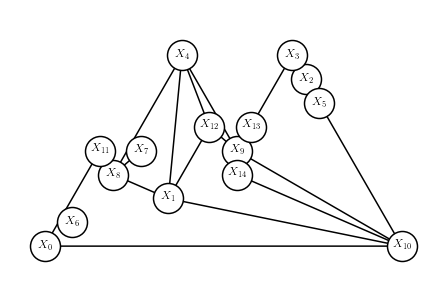

In [7]:
utils.plot_graph(cases[19].sem.W)

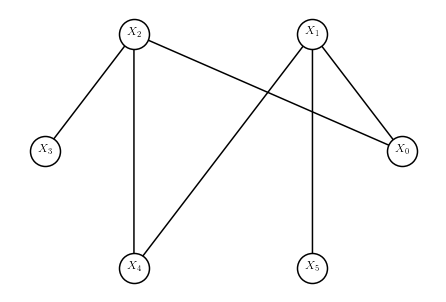

set() accepted Pooled: [0. 0. 0. 0. 0. 0. 0.] MSE: 1.3001
{0} accepted Pooled: [1. 0. 0. 0. 0. 0. 0.] MSE: 0.8069
{2} rejected Pooled: [ 0.    0.    0.02  0.    0.    0.   -0.14] MSE: 1.1606
{3} accepted Pooled: [0. 0. 0. 0. 0. 0. 0.] MSE: 1.3001
{4} rejected Pooled: [ 0.    0.    0.    0.    0.07  0.   -0.45] MSE: 0.5499
{5} accepted Pooled: [0.   0.   0.   0.   0.   0.67 0.  ] MSE: 0.4297
{0, 2} accepted Pooled: [1. 0. 0. 0. 0. 0. 0.] MSE: 0.8069
{0, 3} accepted Pooled: [1. 0. 0. 0. 0. 0. 0.] MSE: 0.8069
{0, 4} rejected Pooled: [ 0.93  0.    0.    0.    0.03  0.   -0.22] MSE: 0.5189
{0, 5} accepted Pooled: [0.44 0.   0.   0.   0.   0.56 0.  ] MSE: 0.3575
{2, 3} rejected Pooled: [ 0.    0.    0.03 -0.01  0.    0.   -0.14] MSE: 0.9903
{2, 4} rejected Pooled: [ 0.    0.   -0.88  0.    0.88  0.   -0.02] MSE: 0.1480
{2, 5} rejected Pooled: [ 0.    0.    0.01  0.    0.    0.67 -0.05] MSE: 0.4131
{3, 4} rejected Pooled: [ 0.    0.    0.   -0.05  0.09  0.   -0.44] MSE: 0.3413
{3, 5} accepted

In [16]:
import sempler
from src.policy import ratios
W = np.array([[0,1,1,0,0],
              [0,0,0,0,1],
              [0,0,0,0,1],
              [0,0,1,0,0],
              [0,0,0,0,0]])
W = np.array([[0,1,1,0,0,0],
              [0,0,0,0,1,1],
              [0,0,0,0,1,0],
              [0,0,1,0,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0]])
sempler.utils.plot_graph(W)
sem = sempler.LGANM(W, (0,1))
dobs = sem.sample(population=True)
target = 1
def d(i): return sem.sample(population=True, shift_interventions={i: (10,1)})
result = population_icp.population_icp([dobs, d(3), d(2)], target, debug=True)
result.accepted
for i,r in enumerate(ratios(sem.p, result.accepted)):
    print("X%d: %0.4f = %0.2f/%d" % (i, r, r*len(result.accepted), len(result.accepted)))

In [17]:
k = 19
sem = cases[k].sem
target = cases[k].target
dobs = sem.sample(population=True)
def d(i): return sem.sample(population=True, shift_interventions={i: (10,1)})
envs = [dobs] + [d(i[0]) for i in [[12], [8], [9], [0], [3], [6], [11], [4], [13], [14], [7], [1], [2], [5], [12]]]
result = population_icp.population_icp(envs, target)

In [19]:
for i,r in enumerate(ratios(sem.p, result.accepted)):
    print("X%d: %0.4f = %0.2f/%d" % (i, r, r*len(result.accepted), len(result.accepted)))

X0: 1.0000 = 512.00/512
X1: 1.0000 = 512.00/512
X2: 0.5000 = 256.00/512
X3: 0.5000 = 256.00/512
X4: 0.5000 = 256.00/512
X5: 1.0000 = 512.00/512
X6: 0.5000 = 256.00/512
X7: 0.5000 = 256.00/512
X8: 0.5000 = 256.00/512
X9: 0.0000 = 0.00/512
X10: 0.0000 = 0.00/512
X11: 0.5000 = 256.00/512
X12: 0.5000 = 256.00/512
X13: 0.5000 = 256.00/512
X14: 1.0000 = 512.00/512


**Summary of graphs used**

In [ ]:
n_parents = np.zeros(N)
n_vars = np.zeros(N)
size_mb = np.zeros(N)
for i, case in enumerate(cases):
    n_parents[i] = len(case.truth)
    n_vars[i] = case.sem.p
    mb = utils.graph_info(case.target, case.sem.W)[3]
    size_mb[i] = len(mb)

def plot_hist(data, title):
    bins = np.arange(data.min(), data.max()+2)-0.5
    hist = plt.hist(data, bins, rwidth=0.5, align='mid', color="#BABABA")#colorsb[2])
    plt.xlabel(title)
    
plt.figure(figsize=(8,3))
#plt.subplot(131), plot_hist(n_vars, "Number of variables")
plt.subplot(121), plot_hist(n_parents, "Number of parents"), plt.ylabel("Number of graphs")
plt.subplot(122), plot_hist(size_mb, "Size of the Markov blanket")
print("%d graphs in total" % N)